In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import randn
from numpy import nan as NA
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [6]:
import platform
from matplotlib import font_manager, rc 
import matplotlib
# '-' Î∂ÄÌò∏Í∞Ä Ï†úÎåÄÎ°ú ÌëúÏãúÎêòÍ≤å ÌïòÎäî ÏÑ§Ï†ï 
matplotlib.rcParams['axes.unicode_minus'] = False
# Ïö¥ÏòÅ Ï≤¥Ï†úÎßàÎã§ ÌïúÍ∏ÄÏù¥ Î≥¥Ïù¥Í≤å ÌïòÎäî ÏÑ§Ï†ï # ÏúàÎèÑÏö∞
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name)
#Îß•
elif platform.system() == 'Darwin': 
    rc('font', family='AppleGothic')
# Î¶¨ÎàÖÏä§
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')


## json(JavaScript Object Notation)

- ÏÜçÏÑ±-Í∞í Ïåç( attribute‚Äìvalue pairs and array data types (or any other serializable value))

- "ÌÇ§-Í∞í Ïåç"ÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ Ïò§Î∏åÏ†ùÌä∏Î•º Ï†ÑÎã¨ÌïòÍ∏∞ ÏúÑÌï¥ Ïù∏Í∞ÑÏù¥ ÏùΩÏùÑ Ïàò ÏûàÎäî ÌÖçÏä§Ìä∏Î•º ÏÇ¨Ïö©ÌïòÎäî Í∞úÎ∞©Ìòï ÌëúÏ§Ä Ìè¨Îß∑


In [7]:
# jsonÏùÄ pythonÏóêÏÑúÏ≤òÎüº 'ÏúºÎ°ú ÌïòÎ©¥ ÏïàÎêúÎã§. ÌòÑÏû¨ """Î°ú Í∞êÏã∏ Î¨∏ÏûêÏó¥Î°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê

obj = """
{
    "name": "Kim",    "places_lived": ["Seoul", "Korea"],
    "pet": null, "siblings": [{"name": "Scott", "age":25, "pet":"Zuko"}]
}
"""


In [8]:
obj

'\n{\n    "name": "Kim",    "places_lived": ["Seoul", "Korea"],\n    "pet": null, "siblings": [{"name": "Scott", "age":25, "pet":"Zuko"}]\n}\n'

In [9]:
import json

In [12]:
result = json.loads(obj)
result

{'name': 'Kim',
 'places_lived': ['Seoul', 'Korea'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 25, 'pet': 'Zuko'}]}

In [13]:
type(result)

dict

In [15]:
#keyÏôÄ value ÌòïÌÉúÏùò ÏûêÎ£åÍµ¨Ï°∞Ïù∏ Dictionary Í∞ùÏ≤¥Î•º JSON Î¨∏ÏûêÏó¥Î°ú ÎßåÎì§Ïãú json.dumps () Î•º ÏÇ¨Ïö©
asjson = json.dumps(result)
asjson

'{"name": "Kim", "places_lived": ["Seoul", "Korea"], "pet": null, "siblings": [{"name": "Scott", "age": 25, "pet": "Zuko"}]}'

In [16]:
!type .\data\coffee.csv

"Coffee","Water","Milk","Icecream"
"Espresso","No","No","No"
"Long Black","Yes","No","No"
"Flat White","No","Yes","No"
"Cappuccino","No","Yes - Frothy","No"
"Affogato","No","No","Yes"


## Í≤ΩÎ°ú Îç∞Ïù¥ÌÑ∞
https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat


In [22]:
import csv
f = open("./data/airports.dat",encoding="UTF-8")
for row in csv.reader(f):
    print(row[0])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279


2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2508
2509
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2609
2610
2612
2613
2614
2615
2616
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2694
2695
2696
2697
2699
2700
2701
2702
2703
2704


6080
6081
6082
6083
6084
6085
6086
6088
6089
6090
6091
6092
6093
6094
6095
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6128
6130
6133
6134
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288


11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12069
12087
12090
1209

In [25]:
import csv
f = open("./data/airports.dat",encoding="UTF-8")
for row in csv.reader(f):
    if row[3]=="Australia"or row[3]=="Rusia":
        print(row[1])

Brisbane Archerfield Airport
Northern Peninsula Airport
Alice Springs Airport
Brisbane International Airport
Gold Coast Airport
Cairns International Airport
Charleville Airport
Mount Isa Airport
Sunshine Coast Airport
Mackay Airport
Proserpine Whitsunday Coast Airport
Rockhampton Airport
Townsville Airport
Weipa Airport
Avalon Airport
Albury Airport
Melbourne Essendon Airport
RAAF Base East Sale
Hobart International Airport
Launceston Airport
Melbourne Moorabbin Airport
Melbourne International Airport
RAAF Williams, Point Cook Base
Adelaide International Airport
RAAF Base Edinburgh
Perth Jandakot Airport
Karratha Airport
Kalgoorlie Boulder Airport
Kununurra Airport
Learmonth Airport
Port Hedland International Airport
Adelaide Parafield Airport
Perth International Airport
Woomera Airfield
Sydney Bankstown Airport
Canberra International Airport
Coffs Harbour Airport
Camden Airport
Dubbo City Regional Airport
RAAF Base Richmond
Sydney Kingsford Smith International Airport
Tamworth Airport

In [40]:
latitudes = {} #ÏúÑÎèÑ
longitudes = {} #Í≤ΩÎèÑ
f = open("./data/airports.dat", encoding='UTF-8')
for row in csv.reader(f):
    airport_id = row[0]
    latitudes[airport_id] = float(row[6])    
    longitudes[airport_id] = float(row[7])
longitudes

{'1': 145.391998291,
 '2': 145.789001465,
 '3': 144.29600524902344,
 '4': 146.725977,
 '5': 147.22000122070312,
 '6': 143.669006348,
 '7': -45.4259986877,
 '8': -51.6781005859,
 '9': -50.7116031647,
 '10': -68.7032012939,
 '11': -18.07270050048828,
 '12': -14.401399612426758,
 '13': -15.2272,
 '14': -17.426001,
 '15': -23.135299682617188,
 '16': -22.605600357056,
 '17': -23.965,
 '18': -21.9405994415,
 '19': -18.9167,
 '20': -20.278900146484375,
 '21': -84.5093994140625,
 '22': -97.03250122070001,
 '23': -63.499401,
 '24': -56.083099365200006,
 '25': -125.775583,
 '26': -89.808098,
 '27': -68.20439910888672,
 '28': -70.99639892578125,
 '29': -96.077796936,
 '30': -125.27100372314453,
 '31': -99.951897,
 '32': -105.138000488,
 '33': -123.869862556,
 '34': -117.632003784,
 '35': -65.449203,
 '36': -66.330299,
 '37': -115.143997,
 '38': -111.444999695,
 '39': -121.939002991,
 '40': -68.5167007446,
 '41': -83.3593978882,
 '42': -139.1280059814453,
 '43': -139.04100036621094,
 '44': -120.51

In [38]:
len(latitudes)
len(longitudes)

7698

In [41]:
!pip install geopy

In [42]:
from geopy.distance import great_circle, geodesic
great_circle((37, 127), (38, 129))
dist = geodesic((37, 127), (38, 129))
dist.km


208.78454157496313

In [44]:
f = open("./data/routes.dat")
for row in csv.reader(f):
    print(row[5])


2990
2990
2962
2990
4078
2990
6969
\N
6160
2952
2990
6969
6156
2965
2966
2968
4029
6156
2948
2975
2990
6969
6160
2966
4029
2922
2948
2975
2975
6160
2975
2968
2975
2990
6969
2972
4364
4078
4029
4029
2948
2972
2937
4078
4078
2937
2936
2935
\N
8944
4078
6924
9026
2923
2937
4078
2937
2936
2968
2937
2937
2937
2937
2789
2789
2808
2789
2781
2806
2786
2812
6067
2781
2806
2801
2789
2806
2812
2801
2789
2781
247
246
246
253
1084
246
253
246
298
246
1044
246
246
246
253
248
1044
247
245
1084
298
280
2673
2688
2673
2709
2715
6045
2688
2688
2673
2709
2673
2670
1678
1678
1678
1054
1678
1678
1678
1665
1506
1264
490
1197
1054
4197
719
715
709
688
718
5595
719
442
722
448
664
746
729
711
737
718
737
688
711
729
737
709
448
737
715
737
730
737
737
460
737
711
737
435
442
737
737
737
5599
737
644
7167
7168
7162
7164
7163
7176
7173
7161
7165
7172
2397
2397
2397
2397
2397
2397
2397
2397
2397
2397
6019
4200
2399
2400
6024
2425
8076
2402
2430
4203
2426
4204
2433
6026
6016
6021
2404
2397
2397
2397
2397
2397
23

55
128
132
147
37
69
196
32
68
196
132
41
55
75
196
132
5534
155
8225
40
5495
5509
100
132
140
148
154
170
196
55
148
37
32
183
196
40
55
55
8225
29
5487
50
55
160
5534
196
55
41
154
29
55
5495
170
55
146
54
196
132
50
132
55
152
69
196
32
37
49
60
69
72
132
155
5487
140
2359
2305
3992
2311
2359
2359
3693
7117
3774
6714
3571
9742
7218
3531
5967
3599
3610
3628
3832
3664
6718
7088
3865
3774
7091
5962
5964
7098
7090
5962
7219
7220
3571
3599
7087
7200
3774
6960
7093
6716
7213
5964
7094
7096
7206
7095
7097
8199
8200
7216
7218
5968
7099
6755
3693
7220
6714
7092
3414
3420
3620
3774
7238
7239
7240
3599
7201
7178
3693
7206
7190
3615
7199
7207
3774
3774
3420
3764
6722
3620
3411
3832
3832
7108
6717
7111
6722
3615
6724
3615
7188
5967
6713
3774
7209
5968
3764
7208
7181
3693
3764
7111
6713
7090
7184
7192
7088
3599
7096
7217
7095
5967
3599
7098
7087
6718
7193
3599
6960
3774
7207
5966
7200
7186
7187
7212
3693
3599
7213
7201
3599
6767
3599
9742
3764
7098
6718
7216
3599
8200
8201
3571
3620
3764
6717
438

3670
3797
3576
3830
3752
3670
3576
4355
3658
3864
2874
3682
2895
3673
4007
4286
3825
3811
3690
3448
3846
3820
3849
1957
3561
4112
1382
3578
4015
3806
3486
3759
4285
1852
3488
1800
3950
3627
3520
3751
3670
3729
3645
599
3730
3494
5738
1555
3533
3879
1948
340
1926
3472
4038
2564
4008
4034
8314
3589
4113
5742
3714
3550
3845
3585
3580
3712
3797
3877
3484
4017
3697
507
1881
3660
5753
1780
3458
3878
3542
3473
1824
4115
4011
3576
3717
3671
3782
3858
3861
3515
1953
4386
3454
3830
3611
3722
3720
6959
3633
3752
3462
3570
1754
3564
1760
3641
3862
3626
3608
4016
3622
3793
3731
3621
3613
3642
4014
3577
3469
1840
1885
2890
3536
3817
4067
3678
2883
2899
3745
3698
3646
4116
3676
2894
3873
4356
100
146
193
2179
3876
3520
3670
3797
3484
3697
3576
3830
3752
3462
3670
3830
3576
3320
3670
3670
3830
507
507
3670
2279
3448
3876
3670
3797
3576
3830
3752
3462
3576
3670
3876
3520
3670
3797
3576
3830
3752
3830
2599
3876
3670
3576
3876
3876
3520
3670
3697
3830
3752
3830
3658
3864
3825
3463
3811
3690
3448
3711
382

1611
346
347
1612
351
1613
1678
2179
3885
344
338
345
348
347
351
1423
344
345
382
341
340
352
342
346
347
371
3998
350
351
1678
3998
345
340
352
350
345
351
1613
1613
351
344
345
342
348
346
351
1613
351
345
346
345
1613
340
1678
351
3998
1055
1688
4091
1051
1452
1130
1458
3998
1056
1612
1423
340
352
342
346
1386
350
351
1613
1678
1452
3998
1423
344
345
342
346
347
1612
351
1613
1678
345
340
1665
346
351
1613
1678
344
345
346
3998
351
345
351
345
346
1613
1055
1230
1212
2170
1459
2179
1688
1506
1519
1460
344
1509
4029
345
1626
4091
1051
410
342
421
1452
1225
1458
1462
507
1054
1229
1231
1469
1561
7447
1520
3998
1760
1470
1472
3953
4317
1486
1476
1056
1590
351
1613
1488
345
351
1613
345
346
350
351
1678
344
338
345
346
347
351
345
1613
1688
293
345
1051
342
1452
1130
1225
1458
1054
7447
1520
3998
1472
4317
1486
1476
1206
1056
351
1613
344
345
342
346
347
350
351
1613
1678
345
351
507
351
351
351
1688
1225
3998
345
3942
351
1230
1212
1216
353
1423
344
609
338
373
345
1626
382
4166
341
3

3682
3682
11051
3682
3682
3682
3682
1382
3682
3682
1382
1897
3682
1382
1335
1386
1273
3682
1386
3682
3682
2276
3682
1382
1555
1386
1324
210
580
3941
1403
1321
1280
1264
1382
1322
1555
1323
1701
1399
1524
1418
1386
1587
1075
1415
2985
1590
287
351
1551
1382
916
917
3682
3682
1382
3484
507
3861
3577
3469
3682
3645
3797
3858
3682
3682
1382
3988
1335
1353
1418
3682
1382
3682
1382
915
1005
1165
1016
907
906
4144
1324
580
1321
1382
1322
1555
1323
3797
1399
1335
1418
1386
495
1435
1590
1551
1382
1382
1382
246
1382
4162
1382
2244
1382
1324
580
1321
1264
302
1382
345
503
478
1353
1524
1354
1386
495
1382
3682
3682
3682
3682
1382
3682
1324
1403
1321
1280
1264
2774
1330
1322
488
2878
503
1529
1335
1229
1606
\N
1359
1353
1354
1418
3998
2881
1274
916
495
1435
1438
1273
1382
1382
1382
280
3797
3576
2881
3682
3682
1382
260
3682
3682
1382
3682
3682
6493
1335
3682
1382
1386
1382
3682
3484
1382
1335
1353
2878
1386
1897
1762
3682
1382
1382
1386
1382
1762
3682
1382
3682
1353
1273
1382
3682
3199
3682
1382
1

3731
3577
3469
146
156
178
193
580
302
1665
421
507
1678
421
3448
3670
340
421
3797
3484
3576
3830
1250
1246
421
3797
3830
502
3077
421
1218
1382
507
1229
1524
738
1382
421
1509
421
421
3797
3576
421
421
421
421
1678
1382
599
345
1555
507
1229
478
628
421
351
351
421
421
507
507
1229
421
421
507
421
421
507
507
507
421
3797
351
421
421
421
3077
345
342
351
421
421
421
421
421
502
737
609
1509
687
421
644
1657
1194
1612
738
421
1229
737
609
1563
421
1229
421
421
421
3797
507
507
507
3797
507
421
1638
580
1382
3682
1382
1555
580
1555
1529
1526
1335
1353
1354
3682
1555
1555
628
630
737
636
608
1538
353
490
344
609
797
1509
488
345
2188
1555
1563
534
352
342
421
515
638
517
2789
1529
522
4059
547
1512
1871
666
665
664
351
1551
1555
580
1382
1555
1197
1551
4019
3673
4007
3825
3811
3690
3448
3820
3849
3561
1382
3578
3806
3876
3759
1852
3488
3627
3520
3751
3670
3645
3559
3494
1555
3533
1804
3472
4038
4008
3566
4113
3714
3550
3457
3845
3585
3580
3712
3797
3877
3484
3660
3458
3878
3473
1824
357

3371
3389
3381
3388
6368
3368
3371
4030
3368
3371
3382
4144
3374
3379
6410
8979
3388
3390
3371
3387
6355
3373
3368
3371
4144
3371
3370
2370
3371
3395
3404
6353
6345
3386
3400
3372
3387
3374
6368
3379
3383
6366
3392
6355
3379
3382
3368
3371
3373
3368
3399
3371
3368
3393
3368
3404
3368
3371
4030
3368
3205
6195
3205
3199
3205
3196
3205
3205
3205
6187
6189
3196
3199
6188
3204
6195
6187
3205
490
610
647
478
547
644
687
1273
532
340
342
346
1524
523
521
532
302
666
490
469
666
490
532
666
532
490
490
302
532
532
641
687
647
353
881
813
880
881
880
881
813
879
797
877
1005
813
907
880
881
879
877
881
880
881
879
797
881
813
2276
3885
580
507
2276
1613
2276
2264
2276
2276
2276
2264
2276
2276
2276
2276
2276
2275
2276
2276
2276
2276
2276
2276
2275
2276
2264
2276
2276
3370
3375
3930
3121
3387
2279
3406
4108
3368
2276
2276
2276
2276
2276
3885
2264
2268
2276
2276
2264
2264
2276
2276
2276
2276
2264
2276
3121
2276
2276
2276
2276
2275
2276
2276
2264
2276
2299
3885
3320
3370
1382
3275
3375
2287
3395
39

3877
3484
2789
1881
2551
2848
1780
3878
2745
1824
1863
3576
1825
2816
1953
3830
1897
2739
2599
2902
1760
2610
1892
1772
2650
1762
1885
2890
1764
2899
1776
3646
2688
2868
2771
193
2709
1871
1871
1871
1871
1885
1871
1871
3550
1767
1863
1871
1772
1776
1871
2709
1871
1871
1871
1885
1871
2709
1871
1871
1871
1871
3364
3364
3364
3364
3364
3366
3400
4085
3372
3402
1909
1909
1923
1909
1909
146
193
1555
1909
1909
1905
1901
1909
1909
1909
2709
2851
1904
1852
3988
2878
1908
1910
1229
1824
1953
1386
2850
1871
1905
1762
1918
2985
1909
146
1909
1905
1909
1909
1905
1909
1909
1555
1909
1762
146
1909
1905
146
193
1909
146
1901
1904
1903
1910
1918
1904
1918
3077
3077
3077
11051
3830
2057
2188
11051
3077
3024
3077
3174
2206
3316
3077
3322
3077
3077
3077
3077
3077
3077
3077
3077
3077
3077
3885
3316
3320
3077
3885
3077
3077
3077
3077
3077
3125
3077
3077
3077
3941
1218
1665
3077
1229
1551
3077
3077
3077
3077
3077
3077
3077
2276
11051
3077
3077
3077
3341
2006
580
2179
3269
3885
3131
3320
2997
3370
3043
1382
4

3570
1754
3564
1871
1760
3641
1836
3862
3626
3608
4016
3622
3793
1774
1892
3731
1772
3621
3613
4359
2650
4014
1762
3577
3469
4348
3609
3748
1840
1885
2890
3536
3817
3867
4067
3678
350
2883
2899
3745
1776
3698
3646
4116
3855
3636
3676
2688
2894
5776
3873
4356
146
193
1678
3682
3645
3858
3682
3797
3697
580
2057
3682
3645
3797
3878
3473
3858
3536
3682
3645
3682
3645
3682
3645
3858
2179
3797
3682
3448
3797
3682
3488
3645
3878
3858
3626
3645
3645
3697
3682
3645
3697
3878
3858
3858
3536
3858
3858
3682
3484
2279
3682
3645
3858
3682
3488
3645
3797
3484
3697
3878
3858
3536
3484
3682
3797
3858
3536
580
3682
580
3682
4069
1382
3806
3759
1852
3488
3645
1555
3585
3712
3797
3877
3484
3697
507
3878
3858
3515
1953
1754
3626
3608
3536
3682
3535
3858
3682
3797
3682
3536
3682
1587
3682
3645
3697
3682
3645
3797
3697
3858
3536
3682
3488
3645
3797
3858
3626
3536
3682
3484
3858
3536
3682
3645
3697
3682
3645
3386
3484
3682
3536
260
3682
3448
1074
3488
3645
3494
3714
3550
3797
3484
1335
3576
3858
280
3830
3752

737
636
609
644
666
665
737
609
644
1212
737
609
737
502
644
644
628
1055
630
1230
1212
737
1218
636
1489
609
1509
1200
1626
1555
1051
687
421
1225
1479
1197
1054
1354
644
3998
1206
666
1056
663
665
664
609
644
737
737
636
344
609
342
502
346
644
337
664
644
609
737
644
666
644
609
644
737
1212
644
1230
1212
737
1054
644
1056
644
737
636
609
687
421
502
644
665
664
737
737
737
636
609
421
644
630
1230
1324
1212
632
580
737
3941
1688
1218
640
1739
636
1216
3885
608
1191
635
1745
1489
344
1474
609
1200
599
535
641
1626
1555
3533
668
1665
342
645
421
3797
2939
16
649
669
638
1197
2948
502
1638
1054
658
478
1227
1606
651
346
1524
1354
1386
3958
3998
1587
1562
1203
1075
3953
1206
666
337
676
1056
415
663
665
1551
1613
3959
679
1212
421
644
628
737
636
609
421
502
644
664
737
737
636
609
421
644
737
609
644
644
609
644
737
609
644
665
421
1230
1212
737
737
609
421
502
644
1230
1212
636
669
502
478
644
337
679
737
1218
636
609
1054
644
666
1056
665
644
344
342
502
346
644
337
1212
644
737
609

3566
3585
3712
3877
3484
3697
1780
3458
3878
3747
3717
3858
3861
1953
3863
3611
3722
3752
3462
3570
1760
3626
3608
3793
3731
3621
4014
3469
2890
3678
3646
3682
3849
3878
3682
1852
3751
3559
3560
3878
3747
3453
3748
3817
3682
3849
3878
3747
3849
3502
3877
3878
3646
3849
3806
3566
3878
3747
3570
3641
3646
3751
3682
3849
4112
3878
3747
3849
3533
3878
3747
3877
4019
3864
3682
2895
3673
3825
3690
3448
3820
3486
3876
3759
1852
3627
3751
3645
3533
4089
3585
3857
3877
3484
1780
3878
3747
3473
4011
3861
1953
3611
3462
3570
1760
3641
3862
3626
3622
3793
3731
3621
4014
2890
3536
3678
3646
3682
3448
3697
3878
3646
3849
3747
3646
3751
3747
3849
3878
3747
3682
3849
3747
3807
3678
3829
3682
3673
3849
3751
3747
3717
3621
3840
3673
3811
3566
3829
3660
3652
3458
3861
3863
3621
3577
3469
3536
3678
3682
3849
3646
3682
3717
3793
4019
3840
3682
3690
3849
3759
1852
3467
3585
3877
3484
3458
3878
3747
3717
3858
3861
3863
3454
3734
3611
3462
3731
3621
1840
3536
3817
3867
3646
3636
3673
3747
3462
3682
3849
3484


1070
3998
1512
1075
1072
548
1253
1080
1376
1246
8414
1209
1212
1501
1626
1222
1636
3998
1056
1515
599
603
599
1222
1218
1367
304
355
1353
1055
1230
1212
490
585
523
1626
3956
491
492
548
1056
1055
1230
1517
1212
4309
1525
1538
1501
1360
1519
1460
1474
1553
535
1626
1066
1051
1222
1225
1213
1054
441
1636
1070
3998
1512
1562
1505
1075
3953
1251
1486
548
1508
1056
1539
1246
1209
599
1066
1353
1230
1212
548
1230
1517
1212
1218
1525
1280
353
1367
1360
1474
1553
304
669
1606
1198
3998
1562
1472
1205
1486
548
1539
8414
1209
1218
1525
1538
1264
353
302
1367
1352
1330
1553
304
1309
373
599
1350
585
1626
4166
3986
355
1399
1638
1054
491
6493
1229
1353
582
4198
3998
548
1435
1056
1376
1246
1374
1055
1230
523
1626
1051
668
502
1054
491
3998
548
1056
3959
680
548
548
599
548
1367
304
1353
4198
355
548
1519
304
548
1515
3941
1474
304
1473
669
3956
478
699
1486
548
304
548
1055
1230
1212
1218
1352
1460
1553
599
1626
1051
1225
468
1054
1227
1606
3998
1236
3953
1056
8414
680
603
548
1517
1519
548
1515

3275
3316
3253
3240
3275
3940
3244
3244
3261
3275
3275
3275
3940
3275
3275
3275
3940
3275
3275
3316
3275
3275
3940
3316
3275
3240
3275
3275
3896
2997
3919
3275
3093
3940
1701
3898
8401
3144
3250
3273
3289
3929
3901
3928
2276
3240
3275
3316
3260
3240
3275
3940
3316
3928
3256
3908
3896
3919
3272
3275
3940
2072
8401
3316
3901
3240
3275
3940
3244
3940
3275
3903
3275
3940
3916
3275
3275
3940
3316
3919
3275
3250
3240
3256
3241
3919
3275
3244
3940
3247
3898
3890
8401
3250
3249
3316
3261
3928
3253
2276
2276
2276
2275
2276
2264
2276
2276
2276
2264
2268
2275
2264
2275
2275
2276
2268
2275
2276
3371
3385
3389
2259
3121
2272
3373
3383
4149
2276
2264
2272
2275
2276
2264
2268
2276
2264
2259
2275
2264
2268
2276
2276
2268
2276
2275
2276
3385
2278
3121
3373
3406
3383
2276
2275
2299
3885
2370
3931
3371
2287
6353
2288
2387
3992
5994
3121
2279
2384
3406
3035
2256
6390
4149
3393
3385
3389
3386
2278
2259
2272
3406
3391
3368
3376
2275
2275
2276
2264
2268
2264
2276
2057
2057
1197
2057
1107
2170
2179
2177
4130


2933
2927
2933
3400
2933
2933
2933
7478
2287
8782
\N
3400
2279
7479
3808
7205
2206
2207
2206
2221
5939
2223
2207
2202
2214
2219
2221
5939
2206
2221
2206
2206
2206
2223
2206
2207
6141
6146
4029
2948
2975
4029
6141
6141
1524
1561
2559
1529
1218
507
1229
1218
1216
502
1229
580
1218
1216
302
1074
609
488
4029
1555
352
342
503
502
1054
1335
1229
1058
346
1418
1386
1214
3998
1243
1057
1273
1246
580
1218
1216
302
609
488
4029
1555
1225
502
1054
1229
231
1386
3998
1218
1229
1218
1229
1230
1212
1218
1216
1225
3998
1253
1246
502
1760
2891
2901
2789
1218
507
1229
1218
507
3576
3830
507
2194
507
11051
507
628
1055
1230
1212
210
2170
580
737
3941
1403
636
1216
1050
1538
1264
1501
302
1382
1074
609
1509
488
1200
1084
4029
338
373
345
1242
535
1555
1066
1563
340
1051
1528
687
1223
352
342
421
1225
2944
3797
2939
1220
2948
1213
348
6756
502
507
1399
1638
1054
629
1335
1229
1231
3576
1606
1353
346
1524
1561
1354
5673
1418
347
1636
231
1386
644
1657
1214
3998
1512
1587
1562
1075
6757
1415
1243
1251
1238

2279
3992
2279
2359
1335
2279
1273
3885
2279
3992
2279
3320
3992
2279
2340
2345
2305
2326
3077
2344
2359
3930
2334
4381
3992
2290
3942
2279
3406
2347
2279
3861
2279
2279
2279
3992
2279
2359
3992
2279
2279
3406
3885
2287
3199
2344
2359
3930
2334
2279
3406
2347
3205
3390
2276
2359
2334
2359
3992
2279
2305
3992
3942
2279
3992
3942
2279
2287
2359
3406
2359
2334
3322
2287
2359
3992
3942
2279
2276
3885
2287
2305
2334
2299
2340
2316
2345
3885
1382
2287
2188
2305
2341
2378
2326
2288
3077
3728
2334
2328
2332
3992
2311
2308
2312
2322
2307
5994
507
2290
2346
2333
3942
2313
2286
2310
2384
2327
3364
3469
3205
3391
2284
3316
2337
2336
2275
2296
2359
3992
3942
2279
2287
2305
4381
3992
2322
2307
3942
2279
2340
2316
2345
2287
2305
2341
2288
2344
2359
4381
2308
2312
2307
2346
2333
2313
2279
2310
2384
2347
2359
3861
2279
2359
2279
2279
2287
3930
2334
3406
3885
3370
2370
3322
2287
11051
2188
2378
3199
421
3077
2359
3728
3930
3304
3388
3321
2372
3406
3205
4144
3390
2276
3392
2359
3406
2359
2334
2359
2334
2

580
260
3682
3682
3682
3682
3682
3682
580
3469
580
1885
1762
3682
580
3682
3682
3682
580
3682
1059
3682
3682
503
3682
3682
3682
3682
3988
3682
1382
580
3682
3728
3808
507
580
3682
3728
3577
3682
3386
3379
3682
580
3940
3492
3682
3682
1767
1871
1776
3682
3682
3484
2526
3682
3682
3682
897
3682
2551
580
3682
3682
580
580
580
2897
3682
3386
3386
3386
580
2939
1885
3682
580
580
580
4380
3682
580
3885
2397
580
580
3682
1555
3682
3682
580
3682
2673
3386
3376
580
580
3682
3682
580
3383
3395
3404
4144
580
3388
3682
90
160
189
193
193
580
580
49
146
580
49
193
73
580
73
120
146
160
580
1606
1606
1606
1194
1606
1606
1606
1509
1606
1606
1606
302
1606
346
1606
1606
1606
1606
1606
1606
1606
1606
1606
1606
1606
1606
1606
1606
1606
1606
1606
210
580
3941
1154
469
490
302
1489
1382
1509
488
4029
345
552
1555
340
534
1665
342
1701
1197
2948
502
507
1529
1335
478
1353
346
521
547
1386
1587
4317
2985
1157
351
1613
1678
1606
1509
1606
1606
1606
1606
1606
1606
3941
1606
1606
1606
1606
1606
6341
6341
6341
63

679
679
679
679
679
679
669
679
679
580
737
3941
1218
1739
302
1489
1382
609
345
3964
340
668
1665
342
1701
3797
2939
669
671
1197
2948
507
1638
1569
2945
1229
2954
346
1524
1354
2947
3830
1657
3364
674
1587
3953
675
1194
2985
676
3973
415
1590
1613
3959
680
193
1678
340
346
679
679
679
1885
1885
1889
1885
1885
1892
1885
1879
1885
1885
1863
6945
6731
1879
1881
1863
5847
1887
6732
5844
1889
1885
1885
1885
465
514
523
534
517
478
521
465
514
535
523
534
517
478
521
465
514
535
523
534
517
478
521
517
534
517
478
1055
1230
1212
1200
1626
1227
3998
1236
1056
523
534
517
478
521
1055
1230
1212
1715
1626
3998
1056
535
523
517
478
523
517
478
465
535
523
517
478
521
514
523
534
517
478
521
517
1230
1212
1489
1200
1626
1231
1227
3998
1587
1551
1055
1230
1212
4315
1489
1382
1200
1715
1626
4091
1452
1225
1054
1231
1227
1198
3998
1587
1472
1056
465
514
535
523
534
517
478
521
534
517
478
521
523
517
478
534
517
478
1055
1230
1212
1218
4315
1715
1626
1555
1051
1452
1225
1054
1198
3998
1472
1056
52

6350
3379
3370
3393
3395
3077
3382
3372
3364
3406
3390
2276
6387
3379
3383
3370
3375
6008
3395
3077
3179
3382
6383
6385
6399
3364
6347
4302
3390
3369
3376
3379
3383
3370
3077
3364
3391
3406
3389
3386
7898
4085
3384
3382
4033
6383
3387
3388
3406
3391
4108
3369
6392
6390
3379
3392
6393
3386
3382
3406
6345
6341
6345
6341
3406
3399
3364
3391
3406
6342
6434
8979
6944
6341
3364
3406
3390
6348
3379
3392
6341
3406
3399
3370
3394
3371
3382
3372
3388
3406
3390
3376
3379
3392
3375
3077
3382
3388
3364
3406
2276
3399
3379
3378
6341
3406
3400
11473
3378
3379
3391
3374
3379
6375
4054
3382
4033
7862
6432
6341
3382
3364
3391
3390
3400
3382
3364
3391
3406
6341
6341
3364
3390
3395
3406
3379
3395
7932
3399
3379
3384
3388
3376
3370
3395
4120
3077
2264
3382
6379
3394
6341
3387
3388
3373
3364
3406
3391
3374
2276
3376
3379
3406
3388
3406
3390
3392
6351
3885
7505
3370
3043
3932
3375
3393
3024
3931
3371
3395
3076
3196
6375
3404
4054
6434
2188
3385
4120
3389
3386
3077
3179
3930
4085
3381
8781
6944
3384
3125
3372

3121
3121
3121
18
18
18
18
18
11
12
8
15
4248
2006
1959
3341
1969
2037
3320
2009
3322
2011
2012
3077
2015
2018
2017
3484
3339
1960
2005
4095
2023
2279
2024
3321
3351
2028
2029
4075
3406
1959
2031
3469
3361
1963
2034
2007
1997
2047
2041
2042
2045
2030
3351
2006
3469
3316
2006
2009
2042
2006
2009
6255
2011
3359
3316
2042
2030
3351
2006
2037
3320
2011
2014
2015
2025
3339
4095
2023
2024
3321
2028
2029
2031
3361
2034
2042
2030
3320
2006
3351
2006
2009
2042
3351
3469
3484
3469
3351
2006
2042
2006
2009
2006
2009
2028
2042
2006
2006
2009
2042
2006
3351
2006
3351
2006
1815
1804
507
1824
3861
1960
4075
1959
3361
3351
3484
3469
2006
2009
3406
2042
3484
3469
3484
2006
3484
2006
3320
3361
2006
2006
2009
2042
2006
2009
2042
2006
2006
2009
2028
2042
2006
2009
3351
3406
2006
6235
9090
9905
6266
6268
3346
3347
3348
6314
7577
2006
2009
2015
2024
2042
2006
2009
2006
3484
3361
2006
3339
3364
3361
1958
2006
3484
3361
2006
2009
2042
3351
2006
3682
340
1804
507
1824
3361
2179
3320
2006
2009
3484
3359
6320
34

3361
2422
3994
2276
6021
4199
6018
3383
156
2404
2397
2397
4206
2397
2397
2397
2397
2430
2397
2397
2397
2397
2397
2397
2397
2397
2397
2397
2397
2430
2397
2397
2397
2397
2397
2397
193
156
6013
2397
2939
2939
2939
2939
2939
2939
2939
2939
2947
1701
2939
1590
1701
2939
1197
1590
2939
2939
2939
2939
2939
2939
2939
2939
2939
1197
1613
2939
2941
2940
2939
2947
2939
2908
580
3941
1218
3885
302
1382
4029
2941
2940
2188
3964
1555
340
1665
2922
421
1452
6105
6106
1701
3797
2952
1197
2948
502
1638
2945
1229
2954
346
1524
1354
2947
4078
1587
1472
3953
2964
4317
2975
3973
1056
1590
2910
351
1613
3959
679
1678
2939
2940
2939
2945
2947
2939
2939
2939
2939
1197
1613
2939
2939
2939
2939
2939
4029
1701
2939
1197
1590
1613
2939
2939
2939
2939
2939
2939
2939
2939
2939
2941
2940
2939
2947
2939
2939
6105
2939
2945
2947
2939
2939
2939
6460
2874
2879
2899
6460
6460
1186
1183
1176
1187
912
1180
9829
1183
1182
4059
1186
1177
1180
1177
1177
1187
1183
4059
1186
1177
5703
1177
1180
4059
1177
1177
1180
1183
1186
11

2934
4029
4078
2934
3885
4029
2930
4078
3364
2934
2923
4029
2952
2948
4078
2964
2975
4029
4029
2939
351
3077
2279
4078
3364
2932
2933
4029
4029
3364
4029
4029
4029
2968
4029
4078
4029
4029
2922
421
2939
2954
4078
3364
1486
4029
4029
4029
4029
2948
4029
4078
4029
4029
4029
2927
2934
4029
4078
4029
4029
4029
4029
4029
4029
4078
2908
3885
2914
4029
2188
2979
3964
6149
340
2912
2922
3077
2935
2937
2927
6147
2948
346
4352
2913
3364
1587
2983
3399
2938
2934
2923
4029
2937
2927
4374
2948
4078
2985
2975
2938
2934
2923
4029
2927
2934
4078
4029
4029
4029
4029
4029
2939
4029
4029
4029
2948
4029
3364
4029
421
2939
3364
4078
4029
4029
4029
4029
4029
2952
4029
4029
4029
4078
4029
4078
3364
2927
2934
4029
4029
4029
4029
4029
3077
3930
2937
2279
4078
3364
2932
2933
4029
2937
4078
3364
248
253
5556
252
249
248
248
248
248
253
813
1044
813
813
813
813
813
797
799
813
813
1107
1084
813
813
813
813
813
886
794
799
2188
800
804
811
820
813
815
979
5604
838
865
4105
6778
813
1044
3714
813
970
794
797
2188
8

2985
2985
2948
2985
2965
2948
2985
2985
2948
2985
2927
2948
2985
2934
2948
2985
2927
2985
2927
2985
2934
2948
2985
2985
2934
2985
2985
2948
2985
1688
3964
1701
6147
2948
2942
2985
2975
2983
1590
2948
2985
2985
2985
2948
2964
2985
2948
2985
2985
2985
2985
4353
2955
2965
1230
580
4362
737
2966
3941
1688
2956
1218
1739
2177
3885
1538
302
1489
1128
3370
1382
2968
1074
609
3093
2941
2940
338
345
2188
3964
1555
340
2912
6933
4274
1665
2922
352
342
3199
1909
421
1452
3077
6105
2935
3714
3930
4330
2937
1701
3797
2939
2957
2952
4375
2927
4374
1579
669
2960
2993
2990
3484
1197
2948
507
1569
1229
3576
1606
3156
2949
2969
2962
2954
346
1524
6969
1354
2972
6119
2279
4364
2947
2958
644
1657
4078
2973
3364
2932
1587
1760
3406
2991
3953
2964
2989
2974
3205
2942
1486
1194
350
2963
2975
337
2983
1056
4111
415
1590
4297
351
2992
3380
3399
2938
2933
1551
1613
3959
2967
2934
679
2923
193
1208
1678
2965
2960
2948
2962
2964
2985
2948
2985
2965
2948
2962
2964
2985
2948
2985
2948
2985
2985
2948
2964
2985
2985


1418
1386
1064
1230
3941
1688
4315
1489
1509
1200
293
5671
1626
1452
1225
1638
286
1606
1561
1636
1070
1512
1587
1562
1075
4317
1253
1590
287
1551
1399
1335
1386
469
490
523
502
492
478
521
548
469
494
490
488
5562
535
523
552
534
517
502
492
478
521
548
1386
1386
1386
502
478
502
478
469
502
1399
1335
478
1418
1386
1435
490
478
523
502
478
521
548
1386
502
478
469
502
492
478
548
1055
1715
1626
1051
1225
1458
1054
1231
1198
3998
1472
4057
1056
1335
1418
1386
1075
469
494
490
488
535
523
534
517
502
492
478
521
548
1386
1335
1386
1418
502
1399
478
1418
1386
502
478
502
469
523
534
502
478
521
548
502
478
469
490
502
478
1055
1688
1103
1715
1051
7447
3998
4057
1056
3998
1056
469
478
502
478
1056
469
502
478
3998
1055
7447
1198
3998
1056
3998
534
469
523
502
1055
4091
3998
1056
469
502
478
502
478
1055
1064
1688
1852
1715
1051
1130
1197
1054
893
7447
1198
3998
1470
1075
1472
1102
4057
1056
502
478
1055
1064
1103
1852
1715
1130
1197
1054
1606
1561
7447
1198
3998
1760
1075
1472
1102
4057
1

2983
2975
4078
2975
4029
4029
3400
4029
2983
4078
2979
6147
6150
2981
2975
2983
2975
1489
4029
2188
6147
346
6150
1198
1486
2975
2983
4029
8076
2188
2979
3964
6147
2913
2983
4029
4029
2979
6147
2965
2968
4274
4374
2960
2993
2990
2975
2992
2975
4029
2979
3964
8774
2964
2975
1743
7563
4029
2948
4029
4029
8076
2188
2979
2975
2960
2975
2979
4029
4029
2968
4274
4374
2960
2975
4078
2975
4029
2968
4029
2993
2975
4029
3400
2927
4352
2975
2923
8076
2975
2960
2968
4274
2975
4029
1489
4029
2979
2948
4029
4374
2975
3941
2965
1382
4029
8076
2188
2979
3964
1555
2912
2922
3400
4374
1579
2960
6147
1197
2948
2962
346
6150
4352
2913
4078
3364
1587
2983
1590
2968
4274
2952
4374
2960
2993
2975
4029
2948
4029
2948
2975
2975
4029
2979
6147
4029
2979
4078
1187
1165
1187
1120
1177
1180
1173
1165
5687
4059
1187
1187
1120
1187
1187
1187
3830
302
298
246
3751
3550
3484
3830
3469
3550
5727
3469
3817
3550
3830
2072
3550
3550
7066
3484
3469
2910
3486
3494
3714
3830
3751
3743
3751
3550
3494
3714
3550
3830
3751
3830


2988
4029
2988
2965
1230
2908
1688
2914
1852
1715
8076
3964
1555
340
4357
1452
3179
1130
2944
2937
1701
3797
4374
2960
6088
2993
3484
2948
507
1229
3576
3156
893
2962
1524
4352
4364
2947
1386
4078
3364
1198
3953
4367
994
4057
2975
2983
1590
2910
1551
1613
193
4029
4029
4029
4029
2988
3077
3077
3077
3269
3931
2305
3179
2359
3930
3992
3382
3308
2268
3077
3077
3077
3077
3077
3077
3077
5859
1953
1948
1948
1948
1932
1953
1953
1948
1948
1953
3811
3849
3759
3494
3533
1953
3608
1953
1953
1953
1952
1953
1953
1953
1953
3722
1953
2891
1949
1953
1932
5859
1943
3533
1948
1941
1944
1909
1949
1950
3878
1930
3576
1952
3722
1754
1946
1951
1956
1930
1953
1953
1948
1953
1953
1953
1953
4371
6139
6140
2975
2993
2975
2988
2972
2958
4078
2975
4111
4377
4274
2975
4371
2988
2992
6138
4078
2975
4111
4362
6142
2989
4078
8428
4111
6138
6138
2972
4364
2974
8428
4111
4371
4368
\N
6159
4078
2975
4111
2992
8428
4274
6138
2993
2972
2974
2988
6138
2972
6139
6140
2974
2992
4377
2989
4369
2990
2974
4111
6138
4111
2988
43

2850
2848
2850
2824
2851
2882
2551
2848
2852
2854
2902
2856
2861
6072
2882
2850
2851
1863
2851
2830
2851
4304
2850
2860
2856
2851
2851
2850
2851
2851
2850
2851
1735
8832
1555
1551
1555
1735
6788
2890
1264
1403
1264
1412
1399
1359
1418
1435
1273
1509
1324
1321
1403
1264
1399
1418
1435
1273
1551
1435
1230
1324
1321
1322
1563
1323
346
1520
3998
1512
1435
1056
1551
1509
1512
1551
1550
1324
1264
1418
4309
1501
1563
1528
1551
1264
1509
1418
1512
1264
1418
1418
1509
1561
1520
1512
1551
1324
1321
1551
1324
1418
1435
1264
1418
1528
1418
1512
1324
1321
1322
1563
1323
1051
1359
346
1561
1520
1356
3998
1512
1587
1435
1056
1551
1246
1264
1528
1418
1551
3998
1246
1418
1264
1418
1214
1264
1501
1563
1528
1561
1418
1435
1526
1551
1550
1551
1418
1551
1324
1321
1280
1264
1359
1418
1512
1264
1418
1324
1321
1512
1216
1264
1501
1509
1479
1510
1418
1520
1512
1511
1514
1418
1214
1501
1512
520
520
5574
520
467
514
472
521
520
488
3361
2006
3320
3355
3940
3339
3321
3351
3316
3361
3341
1969
3320
3322
3339
3321
3

5581
665
644
5586
636
631
635
5587
663
636
4345
644
5585
4325
663
634
635
644
665
532
636
643
638
647
521
664
635
5580
4252
632
631
636
635
641
646
4325
649
653
4252
5588
665
4328
634
635
641
638
647
652
5582
5581
5583
662
663
664
636
609
666
665
637
649
4328
632
637
4325
649
4327
663
5589
6789
\N
188
\N
7252
6789
94
\N
5473
5485
5503
5474
5461
7252
5503
202
\N
8217
5488
5502
5492
188
5502
5492
5488
5461
94
\N
5503
94
202
8217
94
\N
6789
5473
5503
5474
2899
1762
2881
2899
2899
2899
2891
2899
2877
2899
4249
2899
2897
2899
6079
2899
2900
2877
2903
2898
6079
4249
6460
1762
2891
3849
3502
3751
3566
3877
3484
3458
3747
3453
3720
3462
3731
3577
3849
3533
3877
3878
3747
3646
3502
3751
3877
2895
3673
3825
3448
3849
4112
3806
3759
1852
3627
3520
3751
3645
3533
3566
3585
3712
3877
3484
3697
1780
3458
3878
3747
3717
3858
3861
1953
3863
3611
3722
3752
3462
3570
1760
3626
3608
3793
3731
3621
4014
3469
2890
3678
3646
3682
3682
3690
3849
3502
3520
3751
3559
3494
3533
3566
3560
3877
3484
3829
3878
374

1122
1121
4059
5686
5687
1149
1122
1149
1122
5688
1121
1149
1187
5688
1121
5687
1121
4059
2903
2899
2877
2899
2877
2903
2072
2072
2082
2072
2074
2082
2072
2072
2082
2064
2072
2074
2082
2072
2072
2179
2072
2074
2082
2090
2096
2072
2082
2072
2074
2082
2072
2082
2072
2082
2072
2074
2082
2072
1685
2059
2170
1136
5691
2179
3275
1074
2064
2188
2066
3410
8235
7453
2223
2206
1175
3304
2176
502
2207
1132
478
2074
2082
4317
2072
2072
2074
2082
2072
2072
2074
2082
2090
2072
2072
2072
2082
2072
2170
2179
2064
2066
7453
2072
1175
2176
2082
4317
2059
2170
5691
2179
2064
2188
2066
3410
8235
7453
2072
1175
2176
1132
2074
4317
4057
2090
2072
2074
2082
2082
2064
2176
2082
2064
1847
1852
3484
1847
1852
3747
1847
1847
1804
1824
1825
1847
1847
1804
1824
1825
1847
1785
1815
1797
1804
1807
1824
1825
1831
1838
1842
1847
1850
1854
1852
1804
1824
1825
1847
1824
1804
1796
1792
1852
1797
3687
1807
1816
3877
3484
1814
3747
1824
1819
1825
1820
3453
3734
1831
3462
3621
3748
1840
3817
1846
1847
1850
1854
1852
1804
18

In [46]:
distances = []
f = open("./data/routes.dat")
for row in csv.reader(f):
    source_airport = row[3]
    dest_airport = row[5]
    if source_airport in latitudes and dest_airport in latitudes:
        source_lat = latitudes[source_airport]
        source_long = longitudes[source_airport]
        dest_lat = latitudes[dest_airport]
        dest_long = longitudes[dest_airport]
        distances.append(great_circle((source_lat,source_long),(dest_lat,dest_long)).km)

distances

[1506.8277330777387,
 1040.4397895432182,
 448.16554181018654,
 770.5095886094415,
 1338.6333576053873,
 715.6503614468733,
 892.3840483798505,
 951.4335423246899,
 1171.8831507434213,
 1008.2545343994207,
 1685.4289052915774,
 1171.883150743421,
 1506.8277330777385,
 1040.4397895432187,
 770.5095886094417,
 715.6503614468731,
 1008.2545343994209,
 1216.8462864592682,
 723.5242256058544,
 1216.8462864592682,
 1372.8883537724205,
 1464.0590032741716,
 448.16554181018637,
 892.3840483798502,
 1685.428905291577,
 1372.8883537724205,
 554.7041432647163,
 1012.6041440304277,
 1557.1740217580923,
 1324.6136239685436,
 1338.6333576053873,
 1370.2991943842778,
 723.5242256058546,
 554.7041432647164,
 1012.6041440304275,
 1324.6136239685436,
 1370.2991943842778,
 951.4335423246899,
 1464.0590032741718,
 1557.1740217580925,
 488.3403114474664,
 1199.360850196032,
 1338.6333576053873,
 608.6439208266945,
 488.34031144746683,
 608.6439208266945,
 882.1877871724888,
 1458.8263707687943,
 517.487003

Text(0, 0.5, 'Number of flights')

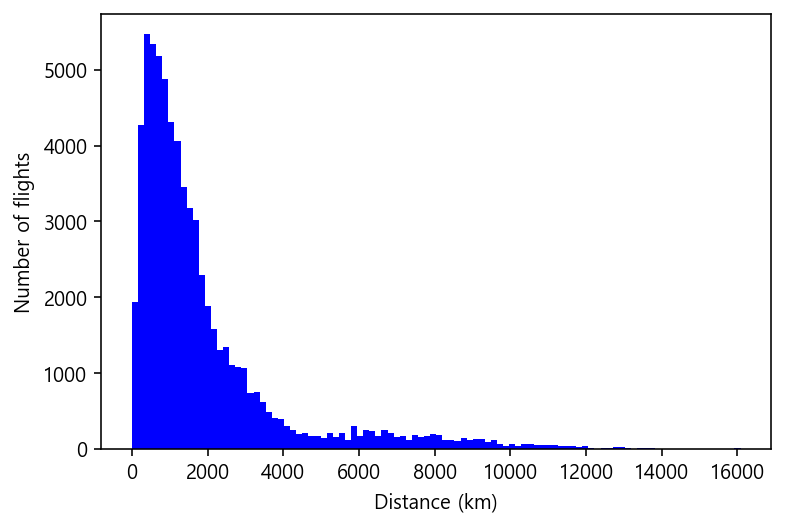

In [47]:
plt.hist(distances,100,facecolor="b")
plt.xlabel("Distance (km)")
plt.ylabel("Number of flights")


In [56]:
from datetime import datetime
now = datetime.now()
print(now)

2021-12-05 10:36:45.926833


In [58]:
now = datetime.now()

print(now.year)
print(now.month)
print(now.day)
print(now.hour)
print(now.minute)
print(now.second)

2021
12
5
10
38
2


In [60]:
now = datetime.now()
print(str(now.month)+"/"+str(now.day)+"/"+str(now.year))
print(str(now.hour)+":"+str(now.minute)+":"+str(now.second))

12/5/2021
10:40:15


# ÏòÅÏóÖÏùº Ï∫òÎ¶∞Îçî (KRX)

* ÌïúÍµ≠Í±∞ÎûòÏÜå ÌôàÌéòÏù¥ÏßÄÏóêÏÑú Ìú¥Ïû•ÏùºÏùÑ xlsÎ°ú Î∞õÏùÑ Ïàò ÏûàÎã§
* Ìú¥Ïû•Ïùº Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÄÌÑ∞ Í∞úÏû•Ïùº(market days)Î•º ÏÉùÏÑ±
* Ìï¥Ïô∏ ÏãúÏû•(CME, EUREX)Îì±ÏùÄ  pandas-market-calendarsÎ•º ÌôúÏö©

<img width="320" src="http://i.imgur.com/ClIQff8.jpg" >

#### 2017 http://fb.com/financedata , http://financedata.github.io
<!-- TEASER_END -->


# ÌïúÍµ≠Í±∞ÎûòÏÜå ÌôàÌéòÏù¥ÏßÄ Ìú¥Ïû•Ïùº Ï°∞Ìöå
ÌïúÍµ≠Í±∞ÎûòÏÜå ÌôàÌéòÏù¥ÏßÄ http://marketdata.krx.co.kr ÏóêÏÑú ÏïÑÎûò Î©îÎâ¥ÏóêÏÑú Ìú¥Ïû•ÏùºÏùÑ Ï°∞ÌöåÌï† Ïàò ÏûàÎã§

#### ÏãúÏû•Ï†ïÎ≥¥ > ÏãúÏû•ÎèôÌñ• > Í≥µÏãú > Ï¶ùÏãúÏùºÏ†ï > Ìú¥Ïû•Ïùº

ÎßÅÌÅ¨Îäî ÏïÑÎûòÏôÄ Í∞ôÎã§

http://marketdata.krx.co.kr/contents/MKD/01/0110/01100305/MKD01100305.jsp

<img width="80%" src="http://i.imgur.com/xUGXh8f.png" >



ÌïúÍµ≠Í±∞ÎûòÏÜå, CME, EUREX Ï∫òÎ¶∞ÎçîÎ•º ÎÖÑÎèÑÎ≥ÑÎ°ú Ï†úÍ≥µÌïòÍ≥† ÏûàÏúºÎ©∞, 'Îã§Ïö¥Î°úÎìú'Î•º ÎàÑÎ•¥Î©¥ ÏóëÏÖÄ(data.xls)ÌååÏùºÎ°ú Îã§Ïö¥Î°úÎìú Ìï† Ïàò ÏûàÎã§.

Îã§Ïö¥Î°úÎìúÌïú ÌååÏùº(data.xls)ÏùÑ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Í≥µÏú†ÌååÏùº ÎßÅÌÅ¨Î°ú ÎßåÎì§ÏóàÎã§.

- Îç∞Ïù¥ÌÑ∞ https://goo.gl/JGse1n


In [63]:
df_hdays = pd.read_excel("https://goo.gl/JGse1n")
df_hdays


ÏùºÏûê Î∞è ÏöîÏùº    ÏöîÏùºÍµ¨Î∂Ñ          ÎπÑÍ≥†
0   2019-01-01  ÌôîÏöîÏùº             Ïã†Ï†ï
1   2019-02-04  ÏõîÏöîÏùº             ÏÑ§ÎÇ†
2   2019-02-05  ÌôîÏöîÏùº             ÏÑ§ÎÇ†
3   2019-02-06  ÏàòÏöîÏùº             ÏÑ§ÎÇ†
4   2019-03-01  Í∏àÏöîÏùº            ÏÇºÏùºÏ†à
5   2019-05-01  ÏàòÏöîÏùº          Í∑ºÎ°úÏûêÏùòÎÇ†
6   2019-05-06  ÏõîÏöîÏùº     Ïñ¥Î¶∞Ïù¥ÎÇ†(ÎåÄÏ≤¥Ìú¥Ïùº)
7   2019-06-06  Î™©ÏöîÏùº            ÌòÑÏ∂©Ïùº
8   2019-08-15  Î™©ÏöîÏùº            Í¥ëÎ≥µÏ†à
9   2019-09-12  Î™©ÏöîÏùº             Ï∂îÏÑù
10  2019-09-13  Í∏àÏöîÏùº             Ï∂îÏÑù
11  2019-10-03  Î™©ÏöîÏùº            Í∞úÏ≤úÏ†à
12  2019-10-09  ÏàòÏöîÏùº            ÌïúÍ∏ÄÎÇ†
13  2019-12-25  ÏàòÏöîÏùº            ÏÑ±ÌÉÑÏ†à
14  2019-12-31  ÌôîÏöîÏùº          Ïó∞ÎßêÌú¥Ïû•Ïùº

In [64]:
df_hdays = pd.read_excel("data/stock_holodays.xls")
df_hdays


ÏùºÏûê Î∞è ÏöîÏùº    ÏöîÏùºÍµ¨Î∂Ñ          ÎπÑÍ≥†
0   2019-01-01  ÌôîÏöîÏùº             Ïã†Ï†ï
1   2019-02-04  ÏõîÏöîÏùº             ÏÑ§ÎÇ†
2   2019-02-05  ÌôîÏöîÏùº             ÏÑ§ÎÇ†
3   2019-02-06  ÏàòÏöîÏùº             ÏÑ§ÎÇ†
4   2019-03-01  Í∏àÏöîÏùº            ÏÇºÏùºÏ†à
5   2019-05-01  ÏàòÏöîÏùº          Í∑ºÎ°úÏûêÏùòÎÇ†
6   2019-05-06  ÏõîÏöîÏùº     Ïñ¥Î¶∞Ïù¥ÎÇ†(ÎåÄÏ≤¥Ìú¥Ïùº)
7   2019-06-06  Î™©ÏöîÏùº            ÌòÑÏ∂©Ïùº
8   2019-08-15  Î™©ÏöîÏùº            Í¥ëÎ≥µÏ†à
9   2019-09-12  Î™©ÏöîÏùº             Ï∂îÏÑù
10  2019-09-13  Í∏àÏöîÏùº             Ï∂îÏÑù
11  2019-10-03  Î™©ÏöîÏùº            Í∞úÏ≤úÏ†à
12  2019-10-09  ÏàòÏöîÏùº            ÌïúÍ∏ÄÎÇ†
13  2019-12-25  ÏàòÏöîÏùº            ÏÑ±ÌÉÑÏ†à
14  2019-12-31  ÌôîÏöîÏùº          Ïó∞ÎßêÌú¥Ïû•Ïùº

In [67]:
hdays = df_hdays["ÏùºÏûê Î∞è ÏöîÏùº"].str.extract('(\d{4}-\d{2}-\d{2})', expand=False)
hdays

0     2019-01-01
1     2019-02-04
2     2019-02-05
3     2019-02-06
4     2019-03-01
5     2019-05-01
6     2019-05-06
7     2019-06-06
8     2019-08-15
9     2019-09-12
10    2019-09-13
11    2019-10-03
12    2019-10-09
13    2019-12-25
14    2019-12-31
Name: ÏùºÏûê Î∞è ÏöîÏùº, dtype: object

In [68]:
hdays1 = pd.to_datetime(hdays) #datetime64ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò ÌïòÎäî Î∞©Î≤ï

hdays1.name = "ÎÇ†Ïßú"

hdays1

0    2019-01-01
1    2019-02-04
2    2019-02-05
3    2019-02-06
4    2019-03-01
5    2019-05-01
6    2019-05-06
7    2019-06-06
8    2019-08-15
9    2019-09-12
10   2019-09-13
11   2019-10-03
12   2019-10-09
13   2019-12-25
14   2019-12-31
Name: ÎÇ†Ïßú, dtype: datetime64[ns]

### Í∞úÏû•Ïùº(market day)  
2019ÎÖÑ Ï§ëÏóê Í∞úÏû•Ïùº(market day)Î™©Î°ùÏùÑ ÎßåÎì§Ïñ¥ Î≥¥Ïûê. 

Ïö∞ÏÑ† pandas.date_range() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ 1Ïõî 1Ïùº~ 12Ïõî 31ÍπåÏßÄ ÎÇ†ÏßúÎ•º ÏÉùÏÑ±ÌïúÎã§. (365Ïùº)


In [70]:
mdays = pd.date_range("2019-01","2019-12-31") 
mdays

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

Ïù¥Îïå freq Î•º 'B'Î°ú ÏßÄÏ†ï(business day)ÌïòÎ©¥, Ï£ºÎßê(ÌÜ†,Ïùº)ÏùÄ Ï†úÏô∏ÎêúÎã§. (260Ïùº)

ÎÇ†Ïßú ÏÉùÏÑ±Ïóê ÎåÄÌï¥ÏÑúÎäî Îã§Ïùå URLÏùÑ Ï∞∏Í≥† ÌïòÏûê. 
https://pandas.pydata.org/pandas-docs/stable/timeseries.html

ÌäπÌûà, Í∞ÑÍ≤© Î≥ÑÏπ≠(Offset Aliases)Ïóê ÎåÄÌï¥ÏÑúÎäî ÏïÑÎûò ÌëúÏóê Ï†ïÎ¶¨ÎêòÏñ¥ ÏûàÎã§.

https://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases


In [71]:
mdays = pd.date_range("2019-01","2019-12-31",freq="B")
mdays

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')

In [72]:
mdays = mdays.drop(hdays1)
mdays

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', length=246, freq=None)

### DataFrameÏóê Ìú¥Ïû•Ïùº Ï†ÅÏö©ÌïòÍ∏∞  
DataFrameÏóêÏÑú Í∞úÏû•Ïùº(market day)ÎßåÏùÑ Ï∂îÏ∂úÌï¥Ìï¥Ïïº ÌïòÎäî Í≤ΩÏö∞Î•º ÏÇ¥Ìé¥Î≥¥Ïûê.

Îã§ÏùåÍ≥º Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†ïÌï¥ Î≥¥Ïûê. (5Ïõî 1Ïùº~ 5Ïõî 30Ïùº, 1~30ÍπåÏßÄ valuesÎ°ú Ìï†Îãπ)


In [75]:
data = {"values":range(1,32)}

In [76]:
df_sample = pd.DataFrame(data, index = pd.date_range("2019-05-01", "2019-05-31"))
df_sample

values
2019-05-01       1
2019-05-02       2
2019-05-03       3
2019-05-04       4
2019-05-05       5
2019-05-06       6
2019-05-07       7
2019-05-08       8
2019-05-09       9
2019-05-10      10
2019-05-11      11
2019-05-12      12
2019-05-13      13
2019-05-14      14
2019-05-15      15
2019-05-16      16
2019-05-17      17
2019-05-18      18
2019-05-19      19
2019-05-20      20
2019-05-21      21
2019-05-22      22
2019-05-23      23
2019-05-24      24
2019-05-25      25
2019-05-26      26
2019-05-27      27
2019-05-28      28
2019-05-29      29
2019-05-30      30
2019-05-31      31

ÏúÑ Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú Í∞úÏû•ÏùºÎßå Ï∂îÏ∂úÌïòÍ≥†Ïûê ÌïúÎã§. 

DateTimeIndexÎ•º Í∞ÄÏßÑ Îëê Í∞úÏùò DataFrameÏùò ÍµêÏßëÌï©ÏùÑ Íµ¨ÌïòÎäî Í∞ÑÎã®Ìïú Î∞©Î≤ïÏúºÎ°ú pd.merge()ÏùÑ Ïì∏ Ïàò ÏûàÎã§.


In [80]:
df_mdays = pd.DataFrame(index=mdays)
df_mdays.head()

Empty DataFrame
Columns: []
Index: [2019-01-02 00:00:00, 2019-01-03 00:00:00, 2019-01-04 00:00:00, 2019-01-07 00:00:00, 2019-01-08 00:00:00]

In [86]:
# Îëê DataFrame (df_sample, df_mdays)Ïùò Ïù∏Îç±Ïä§Î•º Í∏∞Ï§ÄÏúºÎ°ú Ìï©ÏπúÎã§(merge)
df = pd.merge(df_sample,df_mdays,right_index=True,left_index=True)
df.head(10)

values
2019-05-02       2
2019-05-03       3
2019-05-07       7
2019-05-08       8
2019-05-09       9
2019-05-10      10
2019-05-13      13
2019-05-14      14
2019-05-15      15
2019-05-16      16

# CME, EUREX Ìú¥Ïû•Ïùº

ÏòÅÏóÖÏùº Ï∫òÎ¶∞Îçî Î©îÎâ¥ÏóêÏÑú ÌïúÍµ≠Í±∞ÎûòÏÜå(KRX)Ïô∏Ïóê CME, EUREXÏôÄ Ï∫òÎ¶∞ÎçîÎèÑ Ï†úÍ≥µÌïòÎ©∞, ÏóëÏÖÄÎ°ú Îã§Ïö¥Î°úÎìú Ìïú 2017ÎÖÑ Îç∞Ïù¥ÌÑ∞Îäî Îã§ÏùåÍ≥º Í∞ôÎã§.

* hdays-2017-CME.xls ( https://goo.gl/cvnhy2 ) 
* hdays-2017-EUREX.xls ( https://goo.gl/s2PgBx )


In [90]:
pd.read_excel("https://goo.gl/cvnhy2")

Íµ¨Î∂Ñ          ÏùºÏûê ÏöîÏùº   ÏãúÏû•             ÎπÑÍ≥†
0           Ìú¥Ïû•  2017/01/02  Ïõî  CME  New Year' Day
1           Ìú¥Ïû•  2017/04/14  Í∏à  CME    Good Friday
2  Îã®Ï∂ïÏ¢ÖÎ£å(03:15)  2017/11/24  Í∏à  CME      Ï∂îÏàòÍ∞êÏÇ¨Ï†à Îã§ÏùåÎÇ†
3           Ìú¥Ïû•  2017/12/25  Ïõî  CME  Christmas Day

In [91]:
pd.read_excel("https://goo.gl/s2PgBx")

Íµ¨Î∂Ñ          ÏùºÏûê ÏöîÏùº     ÏãúÏû•             ÎπÑÍ≥†
0  Ìú¥Ïû•  2017/04/14  Í∏à  EUREX    Good Friday
1  Ìú¥Ïû•  2017/04/17  Ïõî  EUREX  Easter Monday
2  Ìú¥Ïû•  2017/05/01  Ïõî  EUREX     Labour Day
3  Ìú¥Ïû•  2017/12/25  Ïõî  EUREX  Christmas Day
4  Ìú¥Ïû•  2017/12/26  Ìôî  EUREX     Boxing Day

### Ïä§ÌÅ¨Î†àÏù¥Ìïë, ÌÅ¨Î°§ÎßÅ   179pp
- Scraping: Ïõπ ÏÇ¨Ïù¥Ìä∏Ïùò ÌäπÏ†ï Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌïòÎäî Í≤É. Ïõπ Îç∞Ïù¥ÌÑ∞Ïùò Íµ¨Ï°∞ Î∂ÑÏÑùÏù¥ ÌïÑÏöî. Î°úÍ∑∏Ïù∏Ïù¥ ÌïÑÏöîÌïú Í≤ΩÏö∞Í∞Ä ÎßéÎã§
- Crawling: ÌîÑÎ°úÍ∑∏Îû®Ïù¥ ÏõπÏÇ¨Ïù¥Ìä∏Î•º Ï†ïÍ∏∞Ï†ÅÏúºÎ°ú ÎèåÎ©∞ Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌïòÎäî Í≤É (Ïù¥Îü¨Ìïú ÌîÑÎ°úÍ∑∏Îû®ÏùÑ ÌÅ¨Î°§Îü¨, Ïä§ÌååÏù¥ÎçîÎùºÍ≥† ÌïúÎã§)


In [93]:
!pip install beautifulsoup4

In [94]:
!pip install requests

In [96]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://www.naver.com/"
req = urllib.request.urlopen(url)
res = req.read()
 
soup = BeautifulSoup(res,'html.parser') # BeautifulSoup Í∞ùÏ≤¥ÏÉùÏÑ±
#keywords = soup.find_all('li',class_='corp_item') # Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌÉúÍ∑∏ÏôÄ ÌÅ¥ÎûòÏä§Î•º Ï∞æÎäî Ìï®Ïàò
keywords = soup.find_all('p',class_='desc') # Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌÉúÍ∑∏ÏôÄ ÌÅ¥ÎûòÏä§Î•º Ï∞æÎäî Ìï®Ïàò

print(keywords)


[<p class="desc">Í∏Ä = Ïù¥ÎØ∏ÏÑ†(&lt;Î¶¨ÎìúÎßò&gt; Î©îÏù∏ ÏóêÎîîÌÑ∞. Ïú°ÏïÑ ÏóêÏÑ∏Ïù¥ ÎèÑÏÑú &lt;Í∞ÄÎÅîÏùÄ ÏóÑÎßàÎèÑ Ìá¥Í∑ºÌïòÍ≥† Ïã∂Îã§&gt; ÏßÄÏùå.)Ï†ÄÎÖÅÏúºÎ°ú Îñ°Î≥∂Ïù¥Î•º ÏÇ¨Îã§ Î®πÏûêÍ≥† ÌñàÎã§. ÏïÑÏù¥Îäî Ï¢ãÎã§Í≥† ÌñàÎã§. ÏÇ∞Ï±Ö ÏÇºÏïÑ Í±∏Ïñ¥Í∞îÎã§ Ïò§ÏûêÍ≥† ÌñàÎã§. ÏïÑÏù¥Îäî Îòê Ï¢ãÎã§Í≥† ÌñàÎã§. Ïò§Í∞ÄÎäî Í∏∏Ïóê ÏïÑÏù¥Îäî Î™á Î≤à ÌûòÎì§Îã§ ÌñàÏßÄÎßå ÏòàÏ†ÑÏ≤òÎüº ÎñºÎ•º Ïì∞ÏßÑ ÏïäÏïòÎã§. Í∞ÄÏùÑÏû•ÎßàÎ°ú ÏäµÌïú ÎÇ†Ïî®Ïóê ÎßàÏä§ÌÅ¨ÍπåÏßÄ Ïì¥ </p>, <p class="desc">ÏûÑÏÉÅÏã¨Î¶¨Ï†ÑÎ¨∏Í∞ÄÍ∞Ä ÏïåÎ†§Ï£ºÎäî ÏûêÍ∏∞Ï£ºÎèÑÏ†ÅÏù∏ ÏïÑÏù¥Î•º ÎåÄÌïòÎäî Î≤ï  ÏûêÏã†Ïù¥ ÏÑ†ÌÉùÌïú Í≤ÉÎßå ÌïòÎ†§Îäî ‚ÄòÏûêÍ∏∞Ï£ºÎèÑÏ†Å‚ÄôÏù∏ ÏïÑÏù¥. Ïñ¥ÎñªÍ≤å ÎåÄÌï¥Ïïº Ìï†Íπå? ÎÇ®Ïùò ÎßêÏùÑ Ïûò Îì£ÏßÄ ÏïäÍ≥†, ÌïòÍ∏∞ Ïã´ÏùÄ ÏùºÏùÄ Ïûò Î∞õÏïÑÎì§Ïùº Ï§Ñ Î™®Î•¥Îäî ÏûêÍ∏∞ Ï£ºÎèÑÏÑ± Í∞ïÌïú ÏïÑÏù¥Î•º Îã§Î£®Îäî Î∞©Î≤ïÏóê ÎåÄÌï¥ ÏûÑÏÉÅÏã¨Î¶¨Ï†ÑÎ¨∏Í∞ÄÍ∞Ä Ï°∞Ïñ∏Ìï¥ Ï£ºÏóàÎã§. Î≠êÎì†ÏßÄ ÏûêÏã†Ïù¥ ÌïòÍ≤†Îã§Îäî ÏïÑÏù¥, Ïñ¥ÎñªÍ≤å ÎåÄÌï¥Ïïº Ìï†Íπå? ÏóÑÎßà ÏïÑÎπ†Ïùò ÎèÑÏõÄÏóê ÏùòÏ°¥ÌïòÏßÄ ÏïäÍ≥† </p>, <p class="desc">ÏïàÎÖïÌïòÏÑ∏Ïöî Ï

# jsonÏúºÎ°ú Î≥¥Í∏∞
import json, requests
from pandas.io.json import json_normalize   #https://www.naver.com/
r = requests.get('https://www.naver.com.js')
#r = requests.get('http://rank.search.naver.com/rank.js')
json_normalize(json.loads(r.text), ['data', 'data'])


#### urllib
url Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨  http, ftpÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
#### urlopen() ÏÇ¨Ïö©Î≤ï
- ÏúÑÏùò urlretrive()Îäî Îç∞Ïù¥ÌÑ∞Î•º ÌååÏùºÏóê Î∞îÎ°ú Ï†ÄÏû•ÌïòÏòÄÎã§.
- urlopen()ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Îç∞Ïù¥ÌÑ∞Î•º ÌååÏù¥ÏÑ†ÏóêÏÑú ÏùΩÏùÑ Ïàò ÏûàÎã§.


In [99]:
import urllib.request
url = "http://uta.pw/shodou/img/28/214.png"
savename = "data/test.png"
urllib.request.urlretrieve(url, savename)


('data/test.png', <http.client.HTTPMessage at 0x126f7164610>)

In [101]:
mem = urllib.request.urlopen(url).read()
with open(savename, "wb") as f:
    f.write(mem)


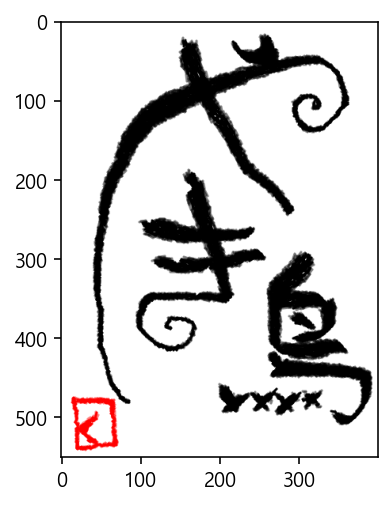

In [102]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread(savename))


In [103]:
# ÌååÎùºÎØ∏ÌÑ∞Î•º Ï†ÑÏÜ°ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÎäî Ïòà
import urllib.parse
API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"


# ÌååÎùºÎØ∏ÌÑ∞ ÏΩîÎî©, ÎîïÏÖîÎÑàÎ¶¨ ÏÇ¨Ïö©, 109: ÏÑúÏö∏ Í≤ΩÍ∏∞ÏßÄÏó≠
values = {
    'stdId': '109'
}

params = urllib.parse.urlencode(values)
url = API + "?" + params
print ("url=", url)
data = urllib.request.urlopen(url).read() # Î∞îÏù¥ÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
text = data.decode("utf-8")
print(text)


url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>Í∏∞ÏÉÅÏ≤≠ Ïú°ÏÉÅ Ï§ëÍ∏∞ÏòàÎ≥¥</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>Í∏∞ÏÉÅÏ≤≠ ÎÇ†Ïî® ÏõπÏÑúÎπÑÏä§</description>
<language>ko</language>
<generator>Í∏∞ÏÉÅÏ≤≠</generator>
<pubDate>2021ÎÖÑ 12Ïõî 05Ïùº (Ïùº)ÏöîÏùº 06:00</pubDate>
 <item>
<author>Í∏∞ÏÉÅÏ≤≠</author>
<category>Ïú°ÏÉÅÏ§ëÍ∏∞ÏòàÎ≥¥</category>
<title>Ï†ÑÍµ≠ Ïú°ÏÉÅ Ï§ëÍ∏∞ÏòàÎ≥¥ - 2021ÎÖÑ 12Ïõî 05Ïùº (Ïùº)ÏöîÏùº 06:00 Î∞úÌëú</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>Ï†ÑÍµ≠ Ïú°ÏÉÅÏ§ëÍ∏∞ÏòàÎ≥¥</title>
		<tm>202112050600</tm>
		<wf><![CDATA[‚óã (ÎÇ†Ïî®) Ïù¥Î≤à ÏòàÎ≥¥Í∏∞Í∞Ñ ÎèôÏïà Í∞ÄÎÅî Íµ¨Î¶ÑÎßéÍ≤†ÏäµÎãàÎã§.<br />‚óã (Í∏∞Ïò®) 8Ïùº(Ïàò)~13Ïùº(Ïõî) ÏïÑÏπ® Í∏∞Ïò®ÏùÄ -1~8ÎèÑ, ÎÇÆ Í∏∞Ïò®ÏùÄ 6~16ÎèÑÎ°ú Ïñ¥Ï†ú(4Ïùº,

In [105]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("http://www.naver.com")          #urlopen : ÏõêÌïòÎäî Ï£ºÏÜåÏùò ÏõπÌéòÏù¥ÏßÄ ÎÇ¥Ïö© Í∞ÄÏ†∏Ïò§Í∏∞


In [106]:
bsObject = BeautifulSoup(html, "html.parser")   #BeautifulSoup Í∞ùÏ≤¥Î°ú Î≥ÄÌôò

for meta in bsObject.head.find_all('meta'): # ÏõπÎ¨∏ÏÑúÏóêÏÑú Î©îÌÉÄ Îç∞Ïù¥ÌÑ∞Îßå Ï∞æÏïÑÏÑú content ÏÜçÏÑ±Í∞íÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞
    print(meta.get('content'))


None
IE=edge
width=1190
NAVER
index,nofollow
ÎÑ§Ïù¥Î≤Ñ Î©îÏù∏ÏóêÏÑú Îã§ÏñëÌïú Ï†ïÎ≥¥ÏôÄ Ïú†Ïö©Ìïú Ïª®ÌÖêÏ∏†Î•º ÎßåÎÇò Î≥¥ÏÑ∏Ïöî
ÎÑ§Ïù¥Î≤Ñ
https://www.naver.com/
https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png
ÎÑ§Ïù¥Î≤Ñ Î©îÏù∏ÏóêÏÑú Îã§ÏñëÌïú Ï†ïÎ≥¥ÏôÄ Ïú†Ïö©Ìïú Ïª®ÌÖêÏ∏†Î•º ÎßåÎÇò Î≥¥ÏÑ∏Ïöî
summary

https://www.naver.com/
https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png
ÎÑ§Ïù¥Î≤Ñ Î©îÏù∏ÏóêÏÑú Îã§ÏñëÌïú Ï†ïÎ≥¥ÏôÄ Ïú†Ïö©Ìïú Ïª®ÌÖêÏ∏†Î•º ÎßåÎÇò Î≥¥ÏÑ∏Ïöî


In [107]:
from bs4 import BeautifulSoup as bs
import requests

# htmlÎ°ú ÏûëÏÑ±Îêú ÏõπÌéòÏù¥ÏßÄ ÏΩîÎìúÎ•º Î∞òÌôò
# htmlÏñ∏Ïñ¥ Íµ¨Ï°∞: <ÌÉúÍ∑∏ ÏÜçÏÑ±=ÏÜçÏÑ±Í∞í> ÌÖçÏä§Ìä∏ </ÌÉúÍ∑∏>
html = requests.get('https://search.naver.com/search.naver?query=ÎÇ†Ïî®')
soup = bs(html.text,'html.parser')

# find(ÌÉúÍ∑∏, {ÏÜçÏÑ±: ÏÜçÏÑ±Í∞í})
# Ï≤òÏùå Îß§Ïπ≠Îêú 1Í∞úÏùò Í∞íÎßå Î∞òÌôò
data1 = soup.find('div',{'class':'detail_box'})

# findAll(ÌÉúÍ∑∏)
# Îß§Ïπ≠Îêú Î™®Îì† Í∞íÏùÑ Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú Î∞òÌôò
data2 = data1.findAll('dd')

# ÎØ∏ÏÑ∏Î®ºÏßÄ ÏßÄÏàò Ï∂úÎ†•
fine_dust = data2[0].find('span',{'class':'num'}).text
print(fine_dust)

# Ï¥àÎØ∏ÏÑ∏Î®ºÏßÄ ÏßÄÏàò Ï∂úÎ†•
ultra_fine_dust = data2[1].find('span',{'class':'num'}).text
print(ultra_fine_dust)


AttributeError: 'NoneType' object has no attribute 'findAll'

In [108]:
import urllib.parse as parse
import urllib.request as req

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
res = req.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')

title = soup.find("title").string
wf = soup.find('wf').string
print(title)
print("-------------")
print(wf)


Í∏∞ÏÉÅÏ≤≠ Ïú°ÏÉÅ Ï§ëÍ∏∞ÏòàÎ≥¥
-------------
‚óã (ÎÇ†Ïî®) Ïù¥Î≤à ÏòàÎ≥¥Í∏∞Í∞Ñ ÎèôÏïà Í∞ÄÎÅî Íµ¨Î¶ÑÎßéÍ≤†ÏäµÎãàÎã§.<br />‚óã (Í∏∞Ïò®) 8Ïùº(Ïàò)~13Ïùº(Ïõî) ÏïÑÏπ® Í∏∞Ïò®ÏùÄ -1~8ÎèÑ, ÎÇÆ Í∏∞Ïò®ÏùÄ 6~16ÎèÑÎ°ú Ïñ¥Ï†ú(4Ïùº, ÏïÑÏπ®ÏµúÏ†ÄÍ∏∞Ïò® -7~2ÎèÑ, ÎÇÆÏµúÍ≥†Í∏∞Ïò® 3~11ÎèÑ)Î≥¥Îã§ ÎÜíÍ≤†ÏäµÎãàÎã§.<br />          14Ïùº(Ìôî)~15Ïùº(Ïàò) ÏïÑÏπ® Í∏∞Ïò®ÏùÄ -5~4ÎèÑ, ÎÇÆ Í∏∞Ïò®ÏùÄ 2~9ÎèÑÎ°ú Ïñ¥Ï†úÏôÄ ÎπÑÏä∑ÌïòÍ≤†ÏäµÎãàÎã§.


In [109]:
import urllib.request as req
url = "http://finance.naver.com/marketindex"
res = req.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')
price = soup.select_one("div.head_info > span.value").string
print("usd/krw=", price)


usd/krw= 1,183.00


### CSS ÏûêÏÑ∏Ìûà ÏïåÏïÑÎ≥¥Í∏∞
- Ïõπ ÌéòÏù¥ÏßÄÏùò Í≤ÄÏÇ¨ Î©îÎâ¥Î•º ÏÑ†ÌÉù (Ïö∞Ï∏° Î≤ÑÌäº)
- ÌäπÏ†ï ÌÉúÍ∑∏Î•º ÏÑ†ÌÉùÌïòÍ≥† Îã§Ïãú Ïö∞Ï∏° Î≤ÑÌäºÏùÑ ÎàÑÎ•¥Í≥† Copy - Copy selectorÎ•º ÏÑ†ÌÉùÌïòÎ©¥ CSS ÏÑ†ÌÉùÏûêÍ∞Ä ÌÅ¥Î¶ΩÎ≥¥ÎìúÏóê Ï†ÄÏû•ÎêúÎã§ (ÏïÑÎûò ÏòàÏãú)

#mw-content-text > div > ul:nth-child(6) > li > b > a

- ÏúÑÏóêÏÑú nth-child(6)ÏùÄ 6Î≤àÏß∏Ïóê ÏûàÎäî ÏöîÏÜåÎ•º Í∞ÄÎ¶¨ÌÇ®Îã§
- Ïù¥Î•º Í∏∞Î∞òÏúºÎ°ú ÏûëÌíàÎ™©Î°ùÏùÑ Í∞ÄÏ†∏Ïò§Îäî ÌîÑÎ°úÍ∑∏Îû®ÏùÑ ÏûëÏÑ±ÌïòÍ≤†Îã§.


In [111]:
from bs4 import BeautifulSoup
import urllib.request as req
# ÏïÑÎûòÎäî Ï†ÄÏûê:Ïú§ÎèôÏ£º Î∂ÄÎ∂ÑÏù∏Îç∞ Ïù¥Îäî ÏõπÏÇ¨Ïù¥Ìä∏ÏóêÏÑú Î≥µÏÇ¨ÌïòÎ©¥ ÎêúÎã§.

url = "https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC"
res = req.urlopen(url)

soup = BeautifulSoup(res, 'html.parser')
a_list= soup.select("#mw-content-text > div > ul a")
for a in a_list:
    name = a.string
    print("-", name)


- ÌïòÎäòÍ≥º Î∞îÎûåÍ≥º Î≥ÑÍ≥º Ïãú
- Ï¶ùÎ≥¥Ìåê
- ÏÑúÏãú
- ÏûêÌôîÏÉÅ
- ÏÜåÎÖÑ
- Îàà Ïò§Îäî ÏßÄÎèÑ
- ÎèåÏïÑÏôÄ Î≥¥Îäî Î∞§
- Î≥ëÏõê
- ÏÉàÎ°úÏö¥ Í∏∏
- Í∞ÑÌåê ÏóÜÎäî Í±∞Î¶¨
- ÌÉúÏ¥àÏùò ÏïÑÏπ®
- Îòê ÌÉúÏ¥àÏùò ÏïÑÏπ®
- ÏÉàÎ≤ΩÏù¥ Ïò¨ ÎïåÍπåÏßÄ
- Î¨¥ÏÑúÏö¥ ÏãúÍ∞Ñ
- Ïã≠ÏûêÍ∞Ä
- Î∞îÎûåÏù¥ Î∂àÏñ¥
- Ïä¨Ìîà Ï°±ÏÜç
- ÎààÍ∞êÍ≥† Í∞ÑÎã§
- Îòê Îã§Î•∏ Í≥†Ìñ•
- Í∏∏
- Î≥Ñ Ìó§Îäî Î∞§
- Ìù∞ Í∑∏Î¶ºÏûê
- ÏÇ¨ÎûëÏä§Îü∞ Ï∂îÏñµ
- ÌùêÎ•¥Îäî Í±∞Î¶¨
- ÏâΩÍ≤å ÏîåÏñ¥ÏßÑ Ïãú
- Î¥Ñ
- Ï∞∏ÌöåÎ°ù
- Í∞Ñ(ËÇù)
- ÏúÑÎ°ú
- ÌåîÎ≥µ
- Î™ªÏûêÎäîÎ∞§
- Îã¨Í∞ôÏù¥
- Í≥†Ï∂îÎ∞≠
- ÏïÑÏö∞Ïùò Ïù∏ÏÉÅÌôî
- ÏÇ¨ÎûëÏùò Ï†ÑÎãπ
- Ïù¥Ï†Å
- ÎπÑÏò§Îäî Î∞§
- ÏÇ∞Í≥®Î¨º
- Ïú†Ïñ∏
- Ï∞Ω
- Î∞îÎã§
- ÎπÑÎ°úÎ¥â
- ÏÇ∞ÌòëÏùò Ïò§ÌõÑ
- Î™ÖÏÉÅ
- ÏÜåÎÇôÎπÑ
- ÌïúÎÇúÍ≥Ñ
- ÌíçÍ≤Ω
- Îã¨Î∞§
- Ïû•
- Î∞§
- Ìô©ÌòºÏù¥ Î∞îÎã§Í∞Ä ÎêòÏñ¥
- ÏïÑÏπ®
- Îπ®Îûò
- ÍøàÏùÄ Íπ®Ïñ¥ÏßÄÍ≥†
- ÏÇ∞Î¶º
- Ïù¥Îü∞ÎÇ†
- ÏÇ∞ÏÉÅ
- ÏñëÏßÄÏ™Ω
- Îã≠
- Í∞ÄÏä¥ 1
- Í∞ÄÏä¥ 2
- ÎπÑÎëòÍ∏∞
- Ìô©Ìòº
- ÎÇ®Ï™Ω ÌïòÎäò
- Ï∞ΩÍ≥µ
- Í±∞Î¶¨ÏóêÏÑú
- ÏÇ∂Í≥º Ï£ΩÏùå
- Ï¥àÌïúÎåÄ
- ÏÇ∞Ïö∏Î¶º
- Ìï¥Î∞îÎùºÍ∏∞ ÏñºÍµ¥
- Í∑ÄÎöúÎùºÎØ∏

# joins.com/ajax
Ïó¨Í∏∞ÏÑúÎäî Îã§Ïùå URLÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏöîÏ≤≠/ÏùëÎãµ ÎêòÏóàÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§

http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1168010600&danjiId=&ptype=&cpId=&aptamt=&aptarea=&aptcnt=&aptIpjudate=

<img width="70%" src="http://i.imgur.com/wAzM0TP.png">


Îã§Ïùå URLÏùò Ïù∏ÏûêÎ°ú Îã§Ïùå Í∞íÎì§Ïù¥ Ï†ÑÎã¨.

http://price.joinsland.joins.com/ajax/price.info.dongapt.asp
* mcateGroup: A1=ÏïÑÌååÌä∏, A6=Ïò§ÌîºÏä§ÌÖî
* mcateCode: A1A3A4
* areaCode=1168010600

Í≤∞Í≥ºÏ†ÅÏúºÎ°ú ÏßÄÏó≠ÏΩîÎìú(areaCode)Îßå ÏßÄÏ†ïÌïòÎ©¥ Í∞ÄÍ≤©  Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÎã§.


# Íµ¨/Ïãú/Íµ∞ (MCODE) ÏΩîÎìú Í∞ÄÏ†∏Ïò§Í∏∞

import requests

# ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÌïòÏúÑ 'Íµ¨/Ïãú/Íµ∞' ÏùΩÍ∏∞
area_code = '110000000' 
url = 'http://price.joinsland.joins.com/ajax/area_search.asp?div=MCODE&areaCode=' + area_code
r = requests.get(url)
print(r.text)

# JSONÏ≤òÎüº Î≥¥Ïù¥ÏßÄÎßå JSON Í∑úÍ≤©ÏùÑ Îî∞Î•¥ÏßÄ ÏïäÍ≥† ÏûàÎã§



# Î≤ïÏ†ïÎèô Ïù¥Î¶ÑÍ≥º ÏΩîÎìú
Î∂ÄÎèôÏÇ∞ Ï†ïÎ≥¥Îì±ÏóêÎäî Î≤ïÏ†ïÎèô ÏΩîÎìúÍ∞Ä ÏÇ¨Ïö©ÎêúÎã§. 
* Î≤ïÏ†ïÎèô ÏΩîÎìú(8ÏûêÎ¶¨)
* 2(Ïãú/ÎèÑ) + 2ÏûêÎ¶¨(Íµ¨/Íµ∞/Íµ¨) + 2ÏûêÎ¶¨(Ïùç/Î©¥/Îèô) + 2ÏûêÎ¶¨(Î¶¨/Îã®ÏßÄ)

Î≤ïÏ†ïÎèô Ï†ÑÏ≤¥ ÏΩîÎìúÎäî ÏïÑÎûò ÎßÅÌÅ¨

* https://goo.gl/tM6r3v
ÏÉÅÏÑ∏Ìïú ÎÇ¥Ïö©ÏùÄ Îã§Ïùå ÎßÅÌÅ¨Ïóê ÏÑ§Î™ÖÏùÑ Ï∞∏Í≥†

* http://nbviewer.jupyter.org/urls/financedata.github.io/posts/korea-area-code.ipynb


In [117]:
import pandas as pd

def get_areacode():
    df_areacode = pd.read_csv('https://goo.gl/tM6r3v', sep='\t', dtype={'Î≤ïÏ†ïÎèôÏΩîÎìú':str, 'Î≤ïÏ†ïÎèôÎ™Ö':str})
    df_areacode = df_areacode[df_areacode['ÌèêÏßÄÏó¨Î∂Ä'] == 'Ï°¥Ïû¨']
    df_areacode = df_areacode[['Î≤ïÏ†ïÎèôÏΩîÎìú', 'Î≤ïÏ†ïÎèôÎ™Ö']]
    return df_areacode

def get_province():
    df_areacode = get_areacode()
    df_province = df_areacode[ df_areacode['Î≤ïÏ†ïÎèôÏΩîÎìú'].str.contains('\d{2}0{8}|36110{6}')]
    return df_province


In [118]:
df_areacode = get_areacode()
df_province = get_province()

df_province


Î≤ïÏ†ïÎèôÏΩîÎìú     Î≤ïÏ†ïÎèôÎ™Ö
0      1100000000    ÏÑúÏö∏ÌäπÎ≥ÑÏãú
2615   2600000000    Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú
2912   2700000000    ÎåÄÍµ¨Í¥ëÏó≠Ïãú
3244   2800000000    Ïù∏Ï≤úÍ¥ëÏó≠Ïãú
3579   2900000000    Í¥ëÏ£ºÍ¥ëÏó≠Ïãú
3825   3000000000    ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú
4009   3100000000    Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú
4241   3611000000  ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú
4391   4100000000      Í≤ΩÍ∏∞ÎèÑ
10867  4200000000      Í∞ïÏõêÎèÑ
13666  4300000000     Ï∂©Ï≤≠Î∂ÅÎèÑ
16797  4400000000     Ï∂©Ï≤≠ÎÇ®ÎèÑ
22050  4500000000     Ï†ÑÎùºÎ∂ÅÎèÑ
25397  4600000000     Ï†ÑÎùºÎÇ®ÎèÑ
30169  4700000000     Í≤ΩÏÉÅÎ∂ÅÎèÑ
39299  4800000000     Í≤ΩÏÉÅÎÇ®ÎèÑ
45741  5000000000  Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ

In [119]:
df_areacode.head(10)


Î≤ïÏ†ïÎèôÏΩîÎìú           Î≤ïÏ†ïÎèôÎ™Ö
0  1100000000          ÏÑúÏö∏ÌäπÎ≥ÑÏãú
1  1111000000      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨
2  1111010100  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Ï≤≠Ïö¥Îèô
3  1111010200  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Ïã†ÍµêÎèô
4  1111010300  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Í∂ÅÏ†ïÎèô
5  1111010400  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Ìö®ÏûêÎèô
6  1111010500  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Ï∞ΩÏÑ±Îèô
7  1111010600  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ ÌÜµÏùòÎèô
8  1111010700  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Ï†ÅÏÑ†Îèô
9  1111010800  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ ÌÜµÏù∏Îèô

In [124]:
df_areacode[ df_areacode['Î≤ïÏ†ïÎèôÎ™Ö'].str.contains('ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨') ]


Î≤ïÏ†ïÎèôÏΩîÎìú            Î≤ïÏ†ïÎèôÎ™Ö
1003  1168000000       ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨
1037  1168010100   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ïó≠ÏÇºÎèô
1039  1168010300   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô
1040  1168010400   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ï≤≠Îã¥Îèô
1041  1168010500   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏÇºÏÑ±Îèô
1042  1168010600   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÎåÄÏπòÎèô
1043  1168010700   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ïã†ÏÇ¨Îèô
1044  1168010800   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÎÖºÌòÑÎèô
1045  1168011000  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏïïÍµ¨Ï†ïÎèô
1046  1168011100   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏÑ∏Í≥°Îèô
1047  1168011200   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏûêÍ≥°Îèô
1048  1168011300   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Ïú®ÌòÑÎèô
1049  1168011400   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏùºÏõêÎèô
1050  1168011500   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏàòÏÑúÎèô
1053  1168011800   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÎèÑÍ≥°Îèô

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

http://price.joinsland.joins.com/ajax/price.info.dongapt.asp
* mcateGroup A1=ÏïÑÌååÌä∏, A6=Ïò§ÌîºÏä§ÌÖî
* mcateCode: A1A3A4
* areaCode=1168010600 # Í∞ïÎÇ®Íµ¨ ÎåÄÏπòÎèô


In [129]:
import pandas as pd
url = 'http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=' + '1168010600'
    
print(url)
dfs = pd.read_html(url,encoding='utf-8')
df = dfs[0]
df.head(20)


http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=1168010600


Îã®ÏßÄÎ™Ö Î©¥Ï†Å („é°)           Îß§Îß§Í∞Ä (ÎßåÏõê)  Îß§Î¨º           Ï†ÑÏÑ∏Í∞Ä (ÎßåÏõê)  Îß§Î¨º.1  \
0          Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏)    102  295,000 ~ 315,000   0  130,000 ~ 145,000     0   
1          Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏)    148  390,000 ~ 410,000   0  185,000 ~ 205,000     1   
2          Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏)    181  425,000 ~ 460,000   0  215,000 ~ 235,000     1   
3          Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏)    214  450,000 ~ 500,000   0  255,000 ~ 280,000     1   
4          Í∞úÌè¨Ïö∞ÏÑ±2Ï∞®(ÏïÑÌååÌä∏)    101  290,000 ~ 310,000   0  130,000 ~ 145,000     0   
5          Í∞úÌè¨Ïö∞ÏÑ±2Ï∞®(ÏïÑÌååÌä∏)    146  392,500 ~ 417,500   2  185,000 ~ 205,000     1   
6          Í∞úÌè¨Ïö∞ÏÑ±2Ï∞®(ÏïÑÌååÌä∏)    180  425,000 ~ 468,500   0  215,000 ~ 240,000     0   
7   ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)     31    27,000 ~ 28,500   0    21,500 ~ 24,000     0   
8   ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)     39    31,000 ~ 33,000   1    25,000 ~ 27,000     0   
9   ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)     44    36,000 ~ 38,500   2    28,500 ~ 31,000     0   
10  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)    44A    36,000 ~ 38,500   0    28,500 ~ 31,000     0   
11  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)    45B    36,000 ~ 38,500   0    28,500 ~ 31,000     0   
12  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)    51A    45,000 ~ 50,000   0    31,000 ~ 34,000     0   
13  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)    51B    45,000 ~ 50,000   0    31,000 ~ 34,000     0   
14  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)     53    47,000 ~ 52,000   0    32,000 ~ 35,000     0   
15  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)     58    50,000 ~ 54,500   0    34,500 ~ 36,500     0   
16  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)     63    65,000 ~ 71,000   1    42,000 ~ 46,500     0   
17  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)     68    65,000 ~ 71,000   0    42,000 ~ 46,500     0   
18    ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ™ÖÎ¨∏Í∞Ä(Ï£ºÏÉÅÎ≥µÌï©)    41A    29,750 ~ 31,750   2    26,500 ~ 28,500     0   
19    ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ™ÖÎ¨∏Í∞Ä(Ï£ºÏÉÅÎ≥µÌï©)    43B    29,750 ~ 31,750   0    26,500 ~ 28,500     0   

    Î¨∏ÏùòÏ≤ò  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  
5   NaN  
6   NaN  
7   NaN  
8   NaN  
9   NaN  
10  NaN  
11  NaN  
12  NaN  
13  NaN  
14  NaN  
15  NaN  
16  NaN  
17  NaN  
18  NaN  
19  NaN

In [130]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'http://price.joinsland.joins.com/ajax/price.info.dongapt.asp?mcateGroup=A1&mcateCode=A1A3A4&areaCode=' + '1168010600'

r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')
print(soup)


<html><body><div class="dong_apt">
<h3></h3>
<div class="tbl_box">
<table class="tbl_compare">
<caption class="screen_hide">Í≤åÏãúÌåê Î™©Î°ù</caption>
<colgroup>
<col width="194"/>
<col width="82"/>
<col width="190"/>
<col width="46"/>
<col width="190"/>
<col width="46"/>
<!--col width="60"-->
<col width="226"/>
</colgroup>
<thead>
<tr>
<th class="tit_danzi" scope="col">Îã®ÏßÄÎ™Ö</th>
<th class="tit_area" scope="col">Î©¥Ï†Å <em>(„é°)</em></th>
<th class="tit_price" scope="col"><strong>Îß§Îß§Í∞Ä</strong> <em>(ÎßåÏõê)</em></th>
<th class="tit_maemul" scope="col">Îß§Î¨º</th>
<th class="tit_price" scope="col"><strong>Ï†ÑÏÑ∏Í∞Ä</strong> <em>(ÎßåÏõê)</em></th>
<th class="tit_maemul" scope="col">Îß§Î¨º</th>
<!--th scope="col" class="tit_comparison"><a href="#" title="ÎπÑÍµê">ÎπÑÍµê</a></th-->
<th class="tit_inquiry" scope="col"><a href="#">Î¨∏ÏùòÏ≤ò</a></th>
</tr>
</thead>
<tbody>
<tr>
<td class="txt_danzi" rowspan="4" valign="top"><a href="/area/?mcateGroup=A1&amp;areaCode=1168010600&amp;dan

In [131]:
table = soup.find('table')
trs = table.tbody.find_all('tr')
print(trs)


[<tr>
<td class="txt_danzi" rowspan="4" valign="top"><a href="/area/?mcateGroup=A1&amp;areaCode=1168010600&amp;danjiId=244">Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®</a><br/>(ÏïÑÌååÌä∏)</td>
<td class="num_area"><a href="/area/?mcateGroup=A1&amp;areaCode=1168010600&amp;danjiId=244&amp;ptype=1" style="color:#6284d4">102</a></td>
<td class="num_price">295,000 ~ 315,000 </td>
<td class="num_maemul"><a href="javascript:goMaemul('1','244')">0</a></td>
<td class="num_price">130,000 ~ 145,000</td>
<td class="num_maemul"><a href="javascript:goMaemul('2','244')">0</a></td>
<!--td class="check"><input name="" type="checkbox" value="" /></td-->
<td class="txt_inquiry" rowspan="4" valign="top">
</td>
</tr>, <tr>
<td class="num_area"><a href="/area/?mcateGroup=A1&amp;areaCode=1168010600&amp;danjiId=244&amp;ptype=2" style="color:#6284d4">148</a></td>
<td class="num_price">390,000 ~ 410,000 </td>
<td class="num_maemul"><a href="javascript:goMaemul('1','244')">0</a></td>
<td class="num_price">185,000 ~ 205,000</td>
<td class=

In [132]:
rowspan_val = ''

for tr in trs[:20]: # Ï≤òÏùå 20Í∞ú ÌôïÏù∏
    tds = tr.find_all('td')
    if tds[0].has_attr('rowspan'):
        rowspan_val = tds[0].text
        Îã®ÏßÄÎ™Ö, Î©¥Ï†Å, Îß§Îß§Í∞Ä, Îß§Î¨º, Ï†ÑÏÑ∏Í∞Ä, Ï†ÑÏÑ∏_Îß§Î¨º = tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text, tds[5].text
    else:
        Îã®ÏßÄÎ™Ö, Î©¥Ï†Å, Îß§Îß§Í∞Ä, Îß§Î¨º, Ï†ÑÏÑ∏Í∞Ä, Ï†ÑÏÑ∏_Îß§Î¨º = rowspan_val, tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text
    Îß§Îß§Í∞Ä_Ï†Ä = int(Îß§Îß§Í∞Ä.split(' ~ ')[0].replace(',', ''))
    Îß§Îß§Í∞Ä_Í≥† = int(Îß§Îß§Í∞Ä.split(' ~ ')[1].replace(',', ''))
    Ï†ÑÏÑ∏Í∞Ä_Ï†Ä = int(Ï†ÑÏÑ∏Í∞Ä.split(' ~ ')[0].replace(',', ''))
    Ï†ÑÏÑ∏Í∞Ä_Í≥† = int(Ï†ÑÏÑ∏Í∞Ä.split(' ~ ')[1].replace(',', ''))
    print(Îã®ÏßÄÎ™Ö, Î©¥Ï†Å, Îß§Îß§Í∞Ä_Ï†Ä, Îß§Îß§Í∞Ä_Í≥†, Îß§Î¨º, Ï†ÑÏÑ∏Í∞Ä_Ï†Ä, Ï†ÑÏÑ∏Í∞Ä_Í≥†, Ï†ÑÏÑ∏_Îß§Î¨º)


Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏) 102 295000 315000 0 130000 145000 0
Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏) 148 390000 410000 0 185000 205000 1
Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏) 181 425000 460000 0 215000 235000 1
Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏) 214 450000 500000 0 255000 280000 1
Í∞úÌè¨Ïö∞ÏÑ±2Ï∞®(ÏïÑÌååÌä∏) 101 290000 310000 0 130000 145000 0
Í∞úÌè¨Ïö∞ÏÑ±2Ï∞®(ÏïÑÌååÌä∏) 146 392500 417500 2 185000 205000 1
Í∞úÌè¨Ïö∞ÏÑ±2Ï∞®(ÏïÑÌååÌä∏) 180 425000 468500 0 215000 240000 0
ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©) 31 27000 28500 0 21500 24000 0
ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©) 39 31000 33000 1 25000 27000 0
ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©) 44 36000 38500 2 28500 31000 0
ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©) 44A 36000 38500 0 28500 31000 0
ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©) 45B 36000 38500 0 28500 31000 0
ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©) 51A 45000 50000 0 31000 34000 0
ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©) 51B 45000 50000 0 31

In [133]:
# DataFrameÏúºÎ°ú ÎßåÎì§Í∏∞
values_list = []

table = soup.find('table', attrs={'class':'tbl_compare'})
trs = table.tbody.find_all('tr')

rowspan_val = ''

for tr in trs:
    tds = tr.find_all('td')
    if tds[0].has_attr('rowspan'):
        rowspan_val = tds[0].text
        Îã®ÏßÄÎ™Ö, Î©¥Ï†Å, Îß§Îß§Í∞Ä, Îß§Î¨º, Ï†ÑÏÑ∏Í∞Ä, Ï†ÑÏÑ∏_Îß§Î¨º = tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text, tds[5].text
    else:
        Îã®ÏßÄÎ™Ö, Î©¥Ï†Å, Îß§Îß§Í∞Ä, Îß§Î¨º, Ï†ÑÏÑ∏Í∞Ä, Ï†ÑÏÑ∏_Îß§Î¨º = rowspan_val, tds[0].text, tds[1].text, tds[2].text, tds[3].text, tds[4].text
    Îß§Îß§Í∞Ä_Ï†Ä = int(Îß§Îß§Í∞Ä.split(' ~ ')[0].replace(',', ''))
    Îß§Îß§Í∞Ä_Í≥† = int(Îß§Îß§Í∞Ä.split(' ~ ')[1].replace(',', ''))
    Ï†ÑÏÑ∏Í∞Ä_Ï†Ä = int(Ï†ÑÏÑ∏Í∞Ä.split(' ~ ')[0].replace(',', ''))
    Ï†ÑÏÑ∏Í∞Ä_Í≥† = int(Ï†ÑÏÑ∏Í∞Ä.split(' ~ ')[1].replace(',', ''))
    values_list.append([Îã®ÏßÄÎ™Ö, Î©¥Ï†Å, Îß§Îß§Í∞Ä_Ï†Ä, Îß§Îß§Í∞Ä_Í≥†, Îß§Î¨º, Ï†ÑÏÑ∏Í∞Ä_Ï†Ä, Ï†ÑÏÑ∏Í∞Ä_Í≥†, Ï†ÑÏÑ∏_Îß§Î¨º])
    
cols = ['Îã®ÏßÄÎ™Ö', 'Î©¥Ï†Å', 'Îß§Îß§Í∞Ä_Ï†Ä', 'Îß§Îß§Í∞Ä_Í≥†', 'Îß§Î¨º', 'Ï†ÑÏÑ∏Í∞Ä_Ï†Ä', 'Ï†ÑÏÑ∏Í∞Ä_Í≥†', 'Ï†ÑÏÑ∏Í∞Ä_Îß§Î¨º']   
df = pd.DataFrame(values_list, columns=cols)

print ("Í±¥Ïàò:", len(df))
df.head(20)


Í±¥Ïàò: 151


Îã®ÏßÄÎ™Ö   Î©¥Ï†Å   Îß§Îß§Í∞Ä_Ï†Ä   Îß§Îß§Í∞Ä_Í≥† Îß§Î¨º   Ï†ÑÏÑ∏Í∞Ä_Ï†Ä   Ï†ÑÏÑ∏Í∞Ä_Í≥† Ï†ÑÏÑ∏Í∞Ä_Îß§Î¨º
0          Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏)  102  295000  315000  0  130000  145000      0
1          Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏)  148  390000  410000  0  185000  205000      1
2          Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏)  181  425000  460000  0  215000  235000      1
3          Í∞úÌè¨Ïö∞ÏÑ±1Ï∞®(ÏïÑÌååÌä∏)  214  450000  500000  0  255000  280000      1
4          Í∞úÌè¨Ïö∞ÏÑ±2Ï∞®(ÏïÑÌååÌä∏)  101  290000  310000  0  130000  145000      0
5          Í∞úÌè¨Ïö∞ÏÑ±2Ï∞®(ÏïÑÌååÌä∏)  146  392500  417500  2  185000  205000      1
6          Í∞úÌè¨Ïö∞ÏÑ±2Ï∞®(ÏïÑÌååÌä∏)  180  425000  468500  0  215000  240000      0
7   ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)   31   27000   28500  0   21500   24000      0
8   ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)   39   31000   33000  1   25000   27000      0
9   ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)   44   36000   38500  2   28500   31000      0
10  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)  44A   36000   38500  0   28500   31000      0
11  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)  45B   36000   38500  0   28500   31000      0
12  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)  51A   45000   50000  0   31000   34000      0
13  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)  51B   45000   50000  0   31000   34000      0
14  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)   53   47000   52000  0   32000   35000      0
15  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)   58   50000   54500  0   34500   36500      0
16  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)   63   65000   71000  1   42000   46500      0
17  ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ©§Î≤ÑÏä§4Ï∞®(Ï£ºÏÉÅÎ≥µÌï©)   68   65000   71000  0   42000   46500      0
18    ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ™ÖÎ¨∏Í∞Ä(Ï£ºÏÉÅÎ≥µÌï©)  41A   29750   31750  2   26500   28500      0
19    ÎåÄÏπòÎåÄÏö∞ÏïÑÏù¥ÎπåÎ™ÖÎ¨∏Í∞Ä(Ï£ºÏÉÅÎ≥µÌï©)  43B   29750   31750  0   26500   28500      0

# Íµ≠Ï†ú ÏÉÅÌíà Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞
ÌååÏù¥Ïç¨ÏóêÏÑú Íµ≠Ï†ú ÏõêÏûêÏû¨(Í∏à, ÏùÄ, Íµ¨Î¶¨, ÏõêÏú†)Ïùò Í∞ÄÍ≤©ÏùÑ Í∞ÄÏ†∏ÏôÄ Îã§Î£®Îäî Î∞©Î≤ï

* Íµ≠Ï†ú Í∏àÍ∞ÄÍ≤© (LBM, Îü∞ÎçòÍ∏àÏùÄÏãúÏû•)
* Íµ≠Ï†ú ÏùÄ Í∞ÄÍ≤© (LBMA, Îü∞Îçò Í∏àÏãúÏû•ÌòëÌöå)
* Íµ≠Ï†ú Íµ¨Î¶¨ Í∞ÄÍ≤© (LME, Îü∞Îçò Í∏àÏÜç Í±∞ÎûòÏÜå)
* Íµ≠Ï†ú ÏõêÏú†Í∞ÄÍ≤© (ÏÑúÎ∂Ä ÌÖçÏÇ¨Ïä§ Ï§ëÏßàÏú†, ÎëêÎ∞îÏù¥Ïú†, Î∂ÅÌï¥ Î∏åÎ†åÌä∏Ïú†)

<img src="http://i.imgur.com/qVjtvea.png" >

### 2017 http://fb.com/financedata


- Îã§ÏùåÍ≥º Í∞ôÏù¥ plot()ÏóêÏÑú figsizeÎ•º Í∏∞Î≥∏ ÌÅ¨Í∏∞Î•º ÏßÄÏ†ïÌï† Ïàò ÎèÑ ÏûàÏßÄÎßå, Îß§Î≤à Í∑∏Î¶¥ Îïå ÎßàÎã§ ÌÅ¨Í∏∞Î•º 
  ÏßÄÏ†ïÌï¥Ïïº ÌïòÎäî Î∂àÌé∏Ìï®Ïù¥ ÏûàÎã§. ÌäπÌûà, ÏãúÍ≥ÑÏó¥ Ï∞®Ìä∏Î•º ÎßéÏù¥ Í∑∏Î¶¨Îäî Í≤ΩÏö∞ ÏãúÍ∞ÑÏóê Îî∞Î•∏ Î≥ÄÌôîÎ•º Î≥¥Í∏∞ ÏúÑÌï¥ 
  Í∞ÄÎ°úÎ°ú Í∏¥ Ï∞®Ìä∏Î•º Í∑∏Î¶¨Îäî Í≤ΩÏö∞Í∞Ä Îçî ÎßéÎã§.

   * plt.figure(figsize=(12, 3))
   * plt.plot(data)

- matplotlib.pylabÏùò rcParams ÏÑ§Ï†ïÏùÑ ÌôúÏö©ÌïòÎ©¥, Ï∞®Ìä∏Ïùò ÌÅ¨Í∏∞ÏôÄ ÏÑ†Ïùò ÏÉâ, ÎëêÍªòÎì±Ïùò Í∏∞Î≥∏ Í∞íÏùÑ ÏÑ§Ï†ïÌï† Ïàò ÏûàÎã§.

   * %matplotlib inline
   * import matplotlib.pylab as plt

   * plt.rcParams["figure.figsize"] = (14,4)
   * plt.rcParams['lines.linewidth'] = 2
   * plt.rcParams['lines.color'] = 'r'
   * plt.rcParams['axes.grid'] = True


In [135]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True


In [136]:
!pip install pandas_datareader


In [137]:
import pandas as pd
import pandas_datareader as pdr


# Íµ≠Ï†ú Í∏àÍ∞ÄÍ≤© (Îü∞Îçò Í∏àÏãúÏû•)
Gold Fixing Price in London Bullion Market (based in U.S. Dollar)
* (HSBC, ÎèÑÏù¥ÏπòÏùÄÌñâ Îì±) 5Í∞ú ÏùÄÌñâÏù¥ ÌöåÏùòÎ•º ÌÜµÌï¥ Gold Fixing Price Î∞úÌëú
* ÌïòÎ£®Ïóê Îëê Î≤à (10:30 AM, 3:00 PM Îü∞ÎçòÏãúÍ∞Ñ)

FRED (ÏÑ∏Ïù∏Ìä∏Î£®Ïù¥Ïä§ Ïó∞Î∞©Ï§ÄÎπÑÏùÄÌñâ Í≤ΩÏ†ú Îç∞Ïù¥ÌÑ∞)
* https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM
* https://fred.stlouisfed.org/series/GOLDPMGBD228NLBM


In [139]:
df_gold = pdr.DataReader('GOLDAMGBD228NLBM', 'fred', start='2000-01-01')    # dataframe

print('row count:', len(df_gold))
df_gold.tail(10)


row count: 5720


GOLDAMGBD228NLBM
DATE                        
2021-11-22           1841.10
2021-11-23           1797.30
2021-11-24           1790.80
2021-11-25           1790.65
2021-11-26           1809.80
2021-11-29           1795.00
2021-11-30           1797.60
2021-12-01           1786.80
2021-12-02           1775.70
2021-12-03           1773.50

<AxesSubplot:xlabel='DATE'>

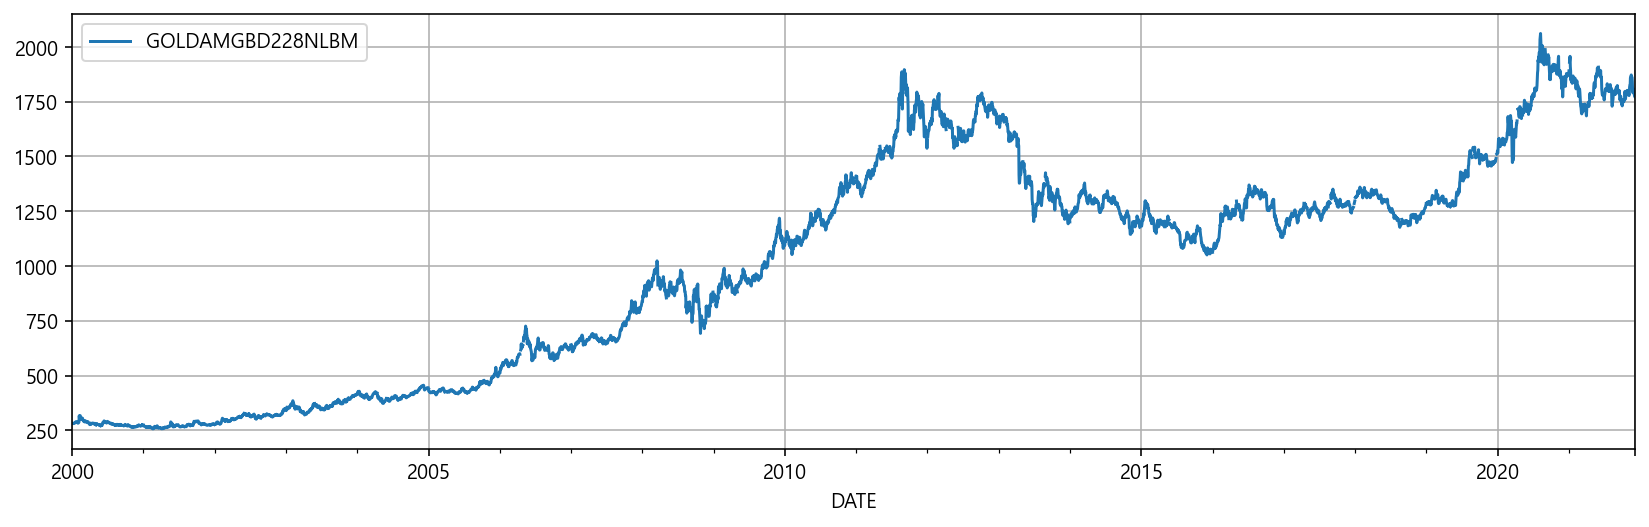

In [141]:
df_gold.plot()

# Íµ≠Ï†ú ÏùÄ Í∞ÄÍ≤©
* https://www.quandl.com/ Îã§ÏñëÌïú Í∏àÏúµ, Í≤ΩÏ†ú Îç∞Ïù¥ÌÑ∞ÏôÄ APIÎ•º Ï†úÍ≥µ)
*  "LBMA/SILVER", Îü∞Îçò Í∏àÏãúÏû•ÌòëÌöå (LBMA) ÏùÄ Í∞ÄÍ≤©


In [145]:
# ÏòÅÍµ≠ ÏùÄ(silver)
df_silver = pdr.DataReader('LBMA/SILVER', 'quandl', api_key='NL_Uy8FexdtU3M6Zxb9a', start='2000-01-01')

print('row count:', len(df_silver))
df_silver.head(10)


row count: 5543


USD    GBP   EURO
Date                            
2021-12-03  22.350  16.85  19.76
2021-12-02  22.395  16.80  19.75
2021-12-01  22.860  17.16  20.19
2021-11-30  22.865  17.14  20.15
2021-11-29  23.235  17.41  20.57
2021-11-26  23.630  17.73  20.95
2021-11-25  23.690  17.78  21.11
2021-11-24  23.495  17.57  20.95
2021-11-23  23.815  17.83  21.18
2021-11-22  24.690  18.37  21.90

<AxesSubplot:xlabel='Date'>

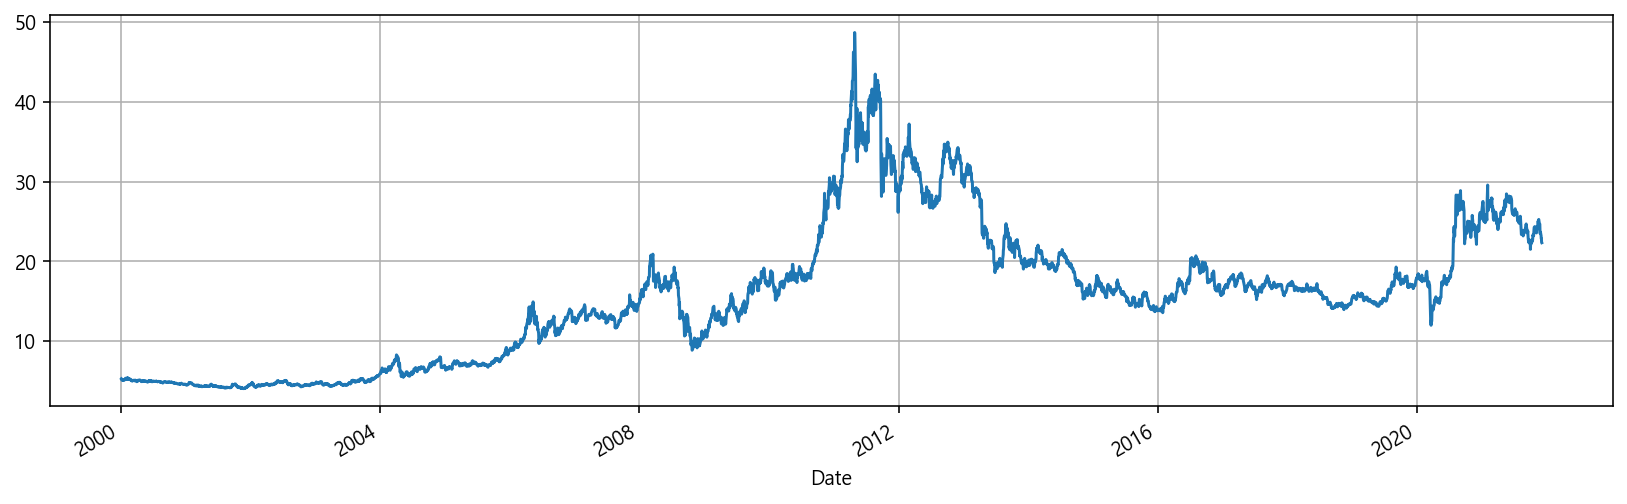

In [144]:
df_silver["USD"].plot()


# Íµ≠Ï†ú ÏõêÏú† Í∞ÄÍ≤©
Íµ≠Ï†ú ÏõêÏú† Í∞ÄÍ≤©ÏùÑ ÎåÄÌëúÌïòÎäî 3ÎåÄ Ïú†Ï¢ÖÏù¥ ÏûàÏúºÎ©∞, ÏÉùÏÇ∞ÏßÄÏôÄ ÎåÄÌëúÏ†ÅÏù∏ ÏÜåÎπÑÏßÄÏó≠Ïù¥ Îã§Î•¥Îã§.

1. ÏÑúÎ∂Ä ÌÖçÏÇ¨Ïä§ Ï§ëÏßàÏú† (POILWTIUSDM): Íµ≠Ï†ú ÏõêÏú†Í∞ÄÍ≤©ÏùÑ ÎåÄÌëú 
1. ÎëêÎ∞îÏù¥Ïú† (POILDUBUSDM): ÌïúÍµ≠Ïù¥ Ï£ºÎ°ú ÏàòÏûÖ(Íµ≠ÎÇ¥ Ïú†Í∞ÄÏóê ÏòÅÌñ•)
1. Î∂ÅÌï¥ Î∏åÎ†åÌä∏Ïú† (POILBREUSDM): Î∂ÅÌï¥ÏóêÏÑú ÏÉùÏÇ∞, Ïú†ÎüΩÍ≥º ÏïÑÌîÑÎ¶¨Ïπ¥ÏóêÏÑú ÏÜåÎπÑ

FRED ÎßÅÌÅ¨Îäî Í∞ÅÍ∞Å Îã§ÏùåÍ≥º Í∞ôÎã§.
* ÏÑúÎ∂Ä ÌÖçÏÇ¨Ïä§ Ï§ëÏßàÏú†(WTI Crude):  https://fred.stlouisfed.org/series/POILWTIUSDM
* ÎëêÎ∞îÏù¥Ïú† (Dubai Crude): https://fred.stlouisfed.org/series/POILDUBUSDM
* Î∂ÅÌï¥ Î∏åÎ†åÌä∏Ïú†(Brent Crude): https://fred.stlouisfed.org/series/POILBREUSDM


In [156]:
# ÏÑúÎ∂Ä ÌÖçÏÇ¨Ïä§ Ï§ëÏßàÏú†(WTI Crude), monthly
df_wt1 = pdr.DataReader('POILWTIUSDM', 'fred', start='2000-01-01',end='2021-12-05')

print('row count:', len(df_wt1))
df_wt.tail(10)


row count: 262


WTI Crude
DATE                 
2021-01-01  51.940000
2021-02-01  59.081000
2021-03-01  62.350000
2021-04-01  61.695455
2021-05-01  65.234762
2021-06-01  71.377727
2021-07-01  72.581818
2021-08-01  67.727273
2021-09-01  71.460455
2021-10-01  81.322857

<AxesSubplot:xlabel='DATE'>

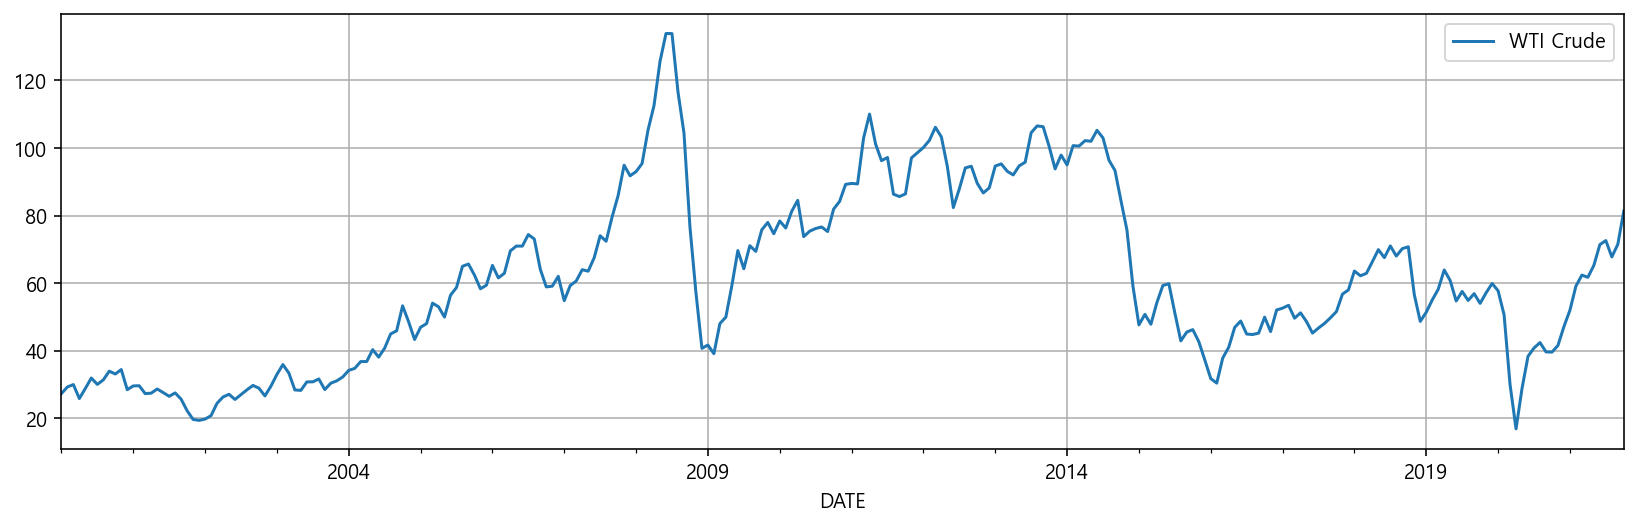

In [149]:
df_wt.columns = ['WTI Crude']
df_wt.plot()


In [159]:
# POILDUBUSDM: ÎëêÎ∞îÏù¥Ïú†
# POILWTIUSDM: ÏÑúÎ∂Ä ÌÖçÏÇ¨Ïä§ Ï§ëÏßàÏú†

df_oil = pdr.DataReader(['POILDUBUSDM', 'POILWTIUSDM','POILBREUSDM'], 'fred', start='2000-01-01')

print('row count:', len(df_oil))
df_oil.tail(10)


row count: 262


POILDUBUSDM  POILWTIUSDM  POILBREUSDM
DATE                                             
2021-01-01    53.968571    51.940000    54.551429
2021-02-01    60.366000    59.081000    61.963500
2021-03-01    63.945652    62.350000    65.186957
2021-04-01    62.318182    61.695455    64.770000
2021-05-01    66.010000    65.234762    68.043333
2021-06-01    70.959545    71.377727    73.067273
2021-07-01    72.882273    72.581818    74.386818
2021-08-01    68.908636    67.727273    70.020909
2021-09-01    72.237273    71.460455    74.598182
2021-10-01    81.216667    81.322857    83.650000

<AxesSubplot:xlabel='DATE'>

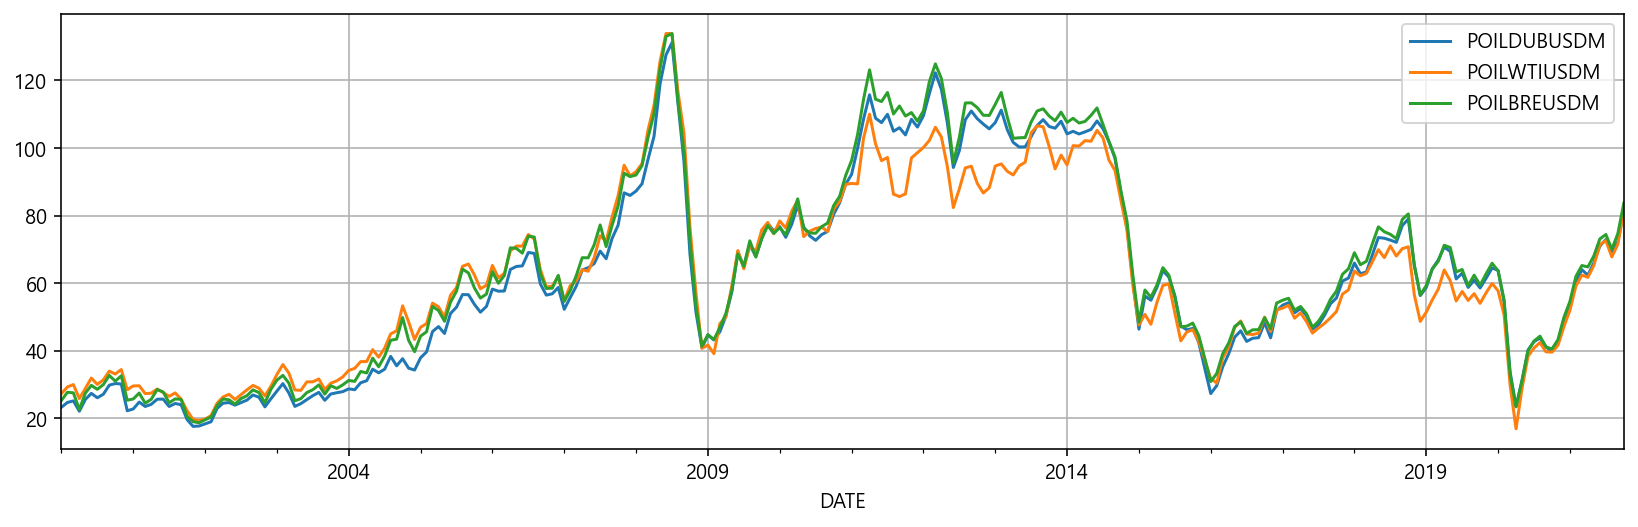

In [161]:
df_oil.plot()

In [163]:
df_oil["diff"]=df_oil['POILDUBUSDM']-df_oil['POILWTIUSDM']
df_oil.tail(10)

POILDUBUSDM  POILWTIUSDM  POILBREUSDM      diff
DATE                                                       
2021-01-01    53.968571    51.940000    54.551429  2.028571
2021-02-01    60.366000    59.081000    61.963500  1.285000
2021-03-01    63.945652    62.350000    65.186957  1.595652
2021-04-01    62.318182    61.695455    64.770000  0.622727
2021-05-01    66.010000    65.234762    68.043333  0.775238
2021-06-01    70.959545    71.377727    73.067273 -0.418182
2021-07-01    72.882273    72.581818    74.386818  0.300455
2021-08-01    68.908636    67.727273    70.020909  1.181364
2021-09-01    72.237273    71.460455    74.598182  0.776818
2021-10-01    81.216667    81.322857    83.650000 -0.106190

In [165]:
df_oil["avg"] = (df_oil['POILDUBUSDM']+df_oil['POILWTIUSDM'] + df_oil['POILBREUSDM'])/3
df_oil.tail(10)

POILDUBUSDM  POILWTIUSDM  POILBREUSDM      diff        avg
DATE                                                                  
2021-01-01    53.968571    51.940000    54.551429  2.028571  53.486667
2021-02-01    60.366000    59.081000    61.963500  1.285000  60.470167
2021-03-01    63.945652    62.350000    65.186957  1.595652  63.827536
2021-04-01    62.318182    61.695455    64.770000  0.622727  62.927879
2021-05-01    66.010000    65.234762    68.043333  0.775238  66.429365
2021-06-01    70.959545    71.377727    73.067273 -0.418182  71.801515
2021-07-01    72.882273    72.581818    74.386818  0.300455  73.283636
2021-08-01    68.908636    67.727273    70.020909  1.181364  68.885606
2021-09-01    72.237273    71.460455    74.598182  0.776818  72.765303
2021-10-01    81.216667    81.322857    83.650000 -0.106190  82.063175

<AxesSubplot:xlabel='DATE'>

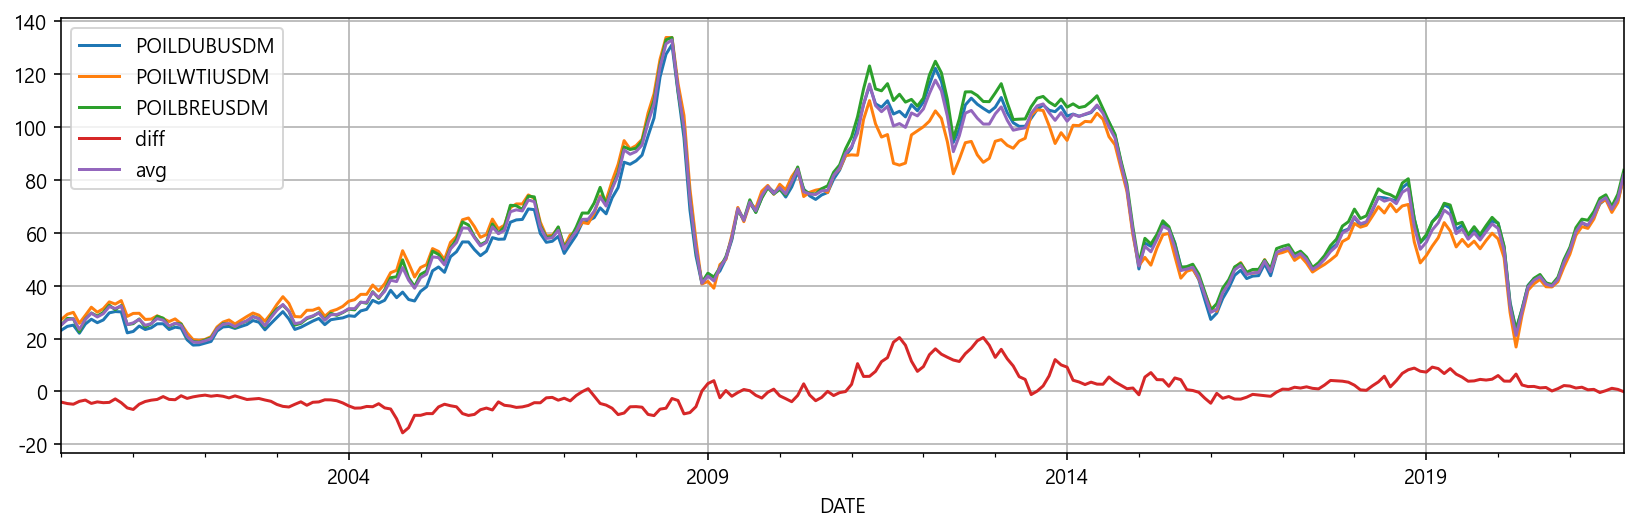

In [166]:
df_oil.plot()

<AxesSubplot:xlabel='DATE'>

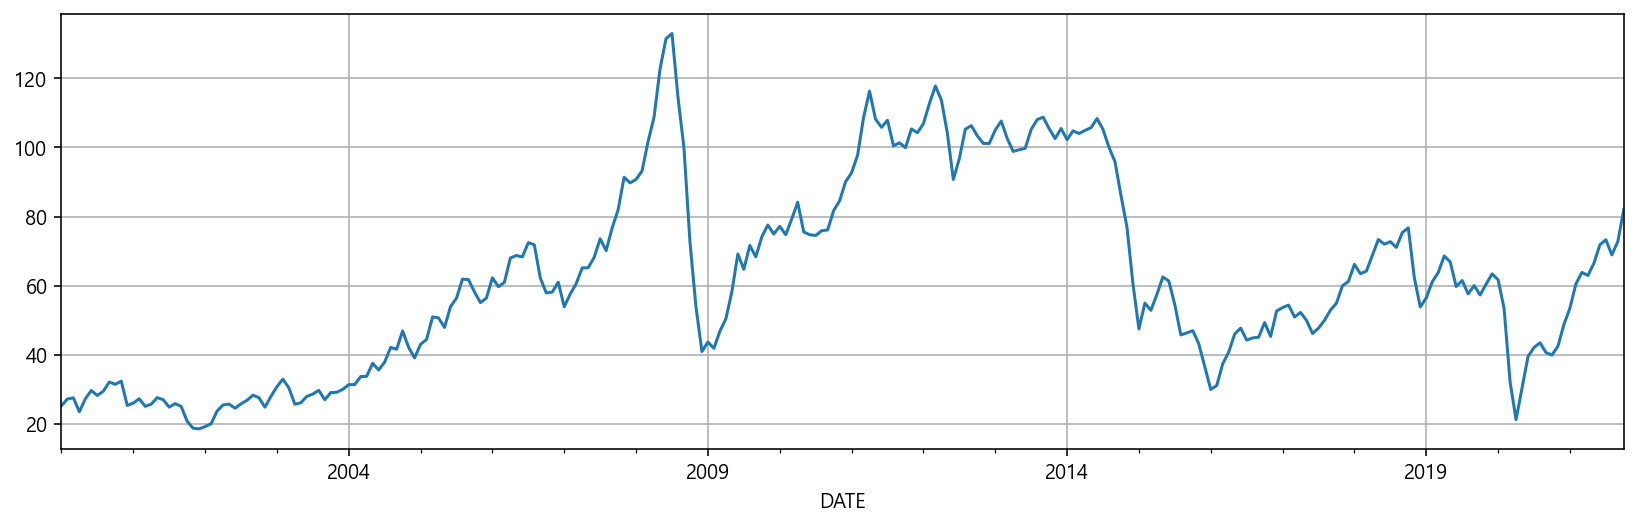

In [167]:
df_oil["avg"].plot()

<AxesSubplot:xlabel='DATE'>

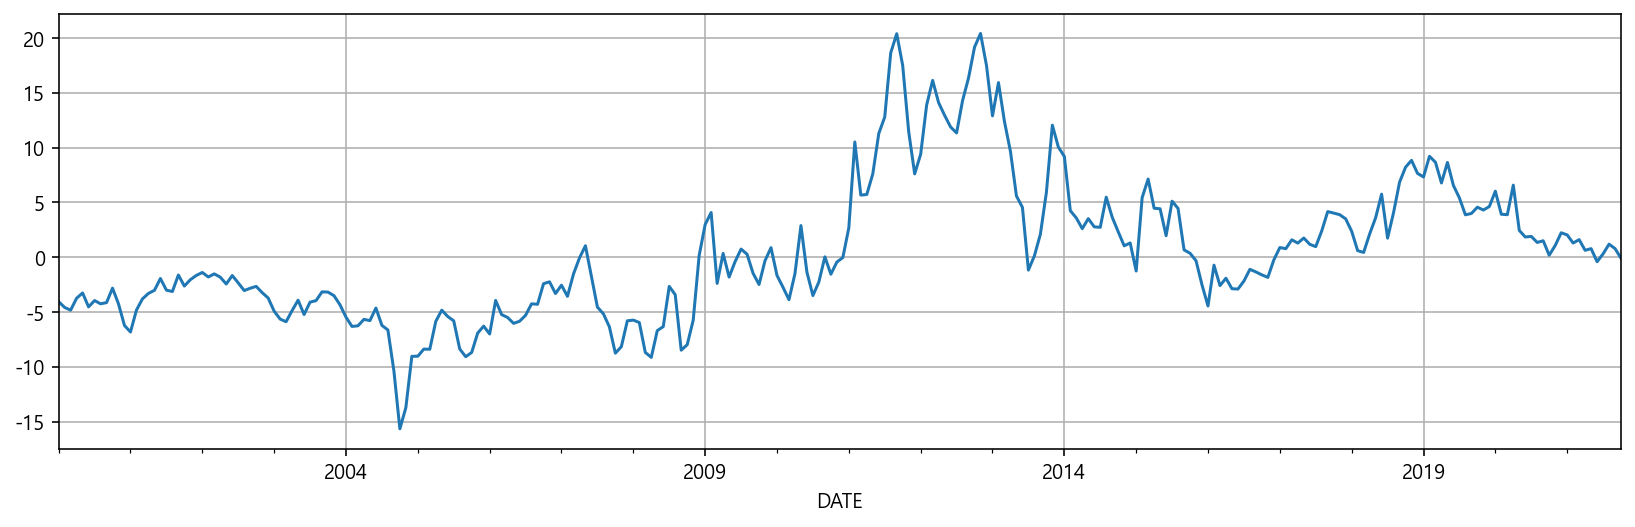

In [168]:
df_oil["diff"].plot()

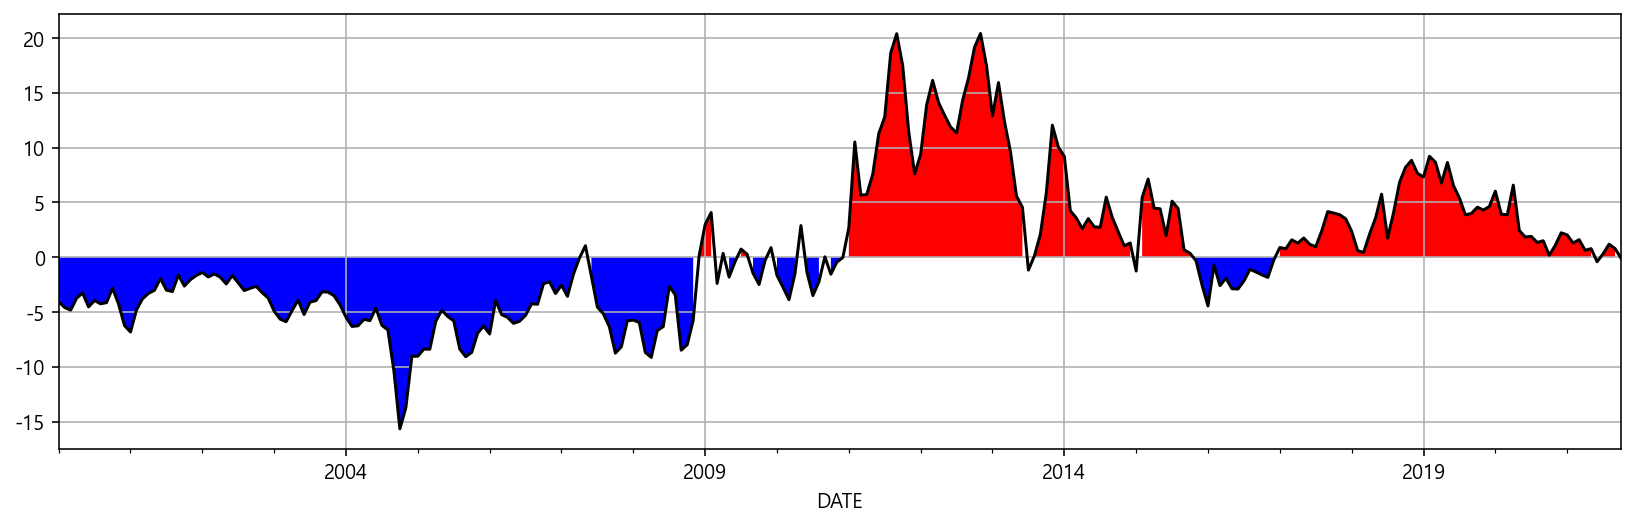

In [175]:
ax = df_oil["diff"].plot(color = "k")

x = df_oil.index
y = df_oil["diff"]

ax.fill_between(x,0,y,where = y>0,facecolor = "r")
ax.fill_between(x,0,y,where = y<=0,facecolor = "b")

# Îã®Ïñ¥-Î≤°ÌÑ∞ ÏÉùÏÑ±

In [179]:
"""
Bag-of-words model - Wikipedia
Îã§ÏùåÏùò Îëê Î¨∏Ïû•Ïù¥ ÏûàÎã§Í≥† ÌïòÏûê,

(1) John likes to watch movies. Mary likes movies too.
(2) John also likes to watch football games.
ÏúÑ Îëê Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ∞ÌôîÌïòÏó¨ Í∞ÄÎ∞©Ïóê Îã¥ÏïÑÏ£ºÎ©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

[
    "John",
    "likes",
    "to",
    "watch",
    "movies",
    "Mary",
    "too",
    "also",
    "football",
    "games"
]
Í∑∏Î¶¨Í≥† Î∞∞Ïó¥Ïùò ÏàúÏÑúÎåÄÎ°ú Í∞ÄÎ∞©ÏóêÏÑú Í∞Å ÌÜ†ÌÅ∞Ïù¥ Î™á Î≤à Îì±Ïû•ÌïòÎäîÏßÄ ÌöüÏàòÎ•º ÏÑ∏Ïñ¥Ï§ÄÎã§.

(1) [1, 2, 1, 1, 2, 1, 1, 0, 0, 0]
(2) [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]
=> Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Ïù¥Ìï¥Ìï† Ïàò ÏûàÎäî ÌòïÌÉúÎ°ú Î∞îÍøîÏ£ºÎäî ÏûëÏóÖÏù¥Îã§.


    "John likes",
    "likes to",
    "to watch",
    "watch movies",
    "Mary likes",
    "likes movies",
    "movies too",
]



SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_24964/2351076120.py, line 25)

### ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò CountVectorizerÎ•º ÌÜµÌï¥ ÌîºÏ≤ò ÏÉùÏÑ±
- Ï†ïÍ∑úÌëúÌòÑÏãùÏùÑ ÏÇ¨Ïö©Ìï¥ ÌÜ†ÌÅ∞ÏùÑ Ï∂îÏ∂úÌïúÎã§.
- Î™®Îëê ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÌôòÏãúÌÇ§Í∏∞ ÎïåÎ¨∏Ïóê good, Good, gOodÏù¥ Î™®Îëê Í∞ôÏùÄ ÌäπÏÑ±Ïù¥ ÎêúÎã§.
- ÏùòÎØ∏ ÏóÜÎäî ÌäπÏÑ±ÏùÑ ÎßéÏù¥ ÏÉùÏÑ±ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ÅÏñ¥ÎèÑ Îëê Í∞úÏùò Î¨∏ÏÑúÏóê ÎÇòÌÉÄÎÇú ÌÜ†ÌÅ∞ÎßåÏùÑ ÏÇ¨Ïö©ÌïúÎã§.
- min_dfÎ°ú ÌÜ†ÌÅ∞Ïù¥ ÎÇòÌÉÄÎÇ† ÏµúÏÜå Î¨∏ÏÑú Í∞úÏàòÎ•º ÏßÄÏ†ïÌï† Ïàò ÏûàÎã§.


In [180]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
        'This is the first document.',
        'This document is the second document.',
        'And this is the third one.',
        'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X)
print(vectorizer.get_feature_names())
print(X.toarray())
vectorizer.vocabulary_


  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}